#### NAMES 
- Arda Agacdelen 
- Ali Emre Arar  
- Alihan Ertekin 

#### Let's Learn About Dataset

In [28]:
# If you do not have these libraries, this commands can be run.
# !pip install prince
# !pip install plotly

In [29]:
import random
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, PowerTransformer, label_binarize
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import plotly.graph_objects as go
from scipy import stats
from prince import PCA
import gdown

# Data Collection and Analysis

In [30]:
# # Read the Dataset
# file_id = "1pEawpejAVejYo9mw61vLqfnH6uCt5u75"
# download_url = f"https://drive.google.com/uc?id={file_id}"
# output_file = "GlobalWeatherRepository.csv"
# gdown.download(download_url, output_file, quiet=False)
# df = pd.read_csv(output_file)


df = pd.read_csv('Data/GlobalWeatherRepository.csv')
# info_set is test set's unprocessed version to visualize meaningful data. Our dataset is updated daily, so we are predicting and testing newly added data everyday
info_set = df.loc[42520:]

df.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   
3                    43.3  Light drizzle  ...                0.7   
4                    78.8  Partly cloudy  ...              183.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                         1                          1   
2              18.4                         1                          1   
3               0.9                         1                          1   
4             262.3                         5                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  04:50 AM  06:50 PM  12:12 PM  01:11 AM  Waxing Gibbous                 55  
1  05:21 AM  07:54 PM  12:58 PM  02:14 AM  Waxing Gibbous                 55  
2  05:40 AM  07:50 PM  01:15 PM  02:14 AM  Waxing Gibbous                 55  
3  06:31 AM  09:11 PM  02:12 PM  03:31 AM  Waxing Gibbous                 55  
4  06:12 AM  05:55 PM  01:17 PM  12:38 AM  Waxing Gibbous                 55  

[5 rows x 41 columns]

In [31]:
# Count numeric columns
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns_count = numeric_columns.value_counts().sum()

# Count categorical columns
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns_count = categorical_columns.value_counts().sum()

# Display the counts
print(f'Number of numeric columns: {numeric_columns_count}')
print(f'Number of categorical columns: {categorical_columns_count}')

# Check the shape of the dataset
print(f'Shape of the Dataset is: {df.shape}')

Number of numeric columns: 30
Number of categorical columns: 11
Shape of the Dataset is: (45054, 41)


In [32]:
# Summary Statistics
df.describe()

latitude     longitude  last_updated_epoch  temperature_celsius  \
count  45054.000000  45054.000000        4.505400e+04         45054.000000   
mean      19.134667     22.135379        1.725886e+09            23.529056   
std       24.481774     65.812468        5.843696e+06             8.802024   
min      -41.300000   -175.200000        1.715849e+09           -24.800000   
25%        3.750000     -6.836100        1.720788e+09            19.100000   
50%       17.250000     23.320000        1.725971e+09            25.600000   
75%       40.400000     50.580000        1.730970e+09            29.100000   
max       64.150000    179.220000        1.735903e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            45054.000000  45054.000000  45054.000000  45054.000000   
mean                74.353696      8.319050     13.392134    171.692946   
std                 15.843688     10.156073     16.343645    102.837522   
min                -12.600000      2.200000      3.600000      1.000000   
25%                 66.300000      4.000000      6.500000     85.000000   
50%                 78.100000      7.200000     11.500000    165.000000   
75%                 84.400000     11.600000     18.700000    259.000000   
max                120.600000   1841.200000   2963.200000    360.000000   

        pressure_mb   pressure_in  ...      gust_kph  \
count  45054.000000  45054.000000  ...  45054.000000   
mean    1013.547676     29.929473  ...     19.395239   
std        6.950668      0.205139  ...     17.976725   
min      971.000000     28.670000  ...      3.600000   
25%     1010.000000     29.830000  ...     10.800000   
50%     1013.000000     29.910000  ...     17.200000   
75%     1017.000000     30.030000  ...     25.900000   
max     1080.000000     31.890000  ...   2970.400000   

       air_quality_Carbon_Monoxide  air_quality_Ozone  \
count                 45054.000000       45054.000000   
mean                    506.888302          62.706355   
std                    1005.734278          38.376388   
min                   -9999.000000           0.000000   
25%                     217.000000          36.500000   
50%                     303.800000          58.700000   
75%                     460.650000          83.700000   
max                   38879.398000         480.700000   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
count                  45054.000000                 45054.000000   
mean                      13.401262                     9.976086   
std                       25.194119                    52.798515   
min                        0.000000                 -9999.000000   
25%                        0.800000                     0.600000   
50%                        2.775000                     2.000000   
75%                       13.135000                     7.400000   
max                      427.700000                   457.690000   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
count       45054.000000      45054.000000              45054.000000   
mean           22.487268         43.984097                  1.613109   
std            45.864603        129.737372                  0.936431   
min             0.185000          0.185000                  1.000000   
25%             4.400000          7.215000                  1.000000   
50%            11.285000         17.945000                  1.000000   
75%            24.975000         40.515000                  2.000000   
max          1614.100000       5858.020000                  6.000000   

       air_quality_gb-defra-index  moon_illumination  
count                45054.000000       45054.000000  
mean                     2.412039          48.038265  
std                      2.385313          35.063953  
min                      1.000000           0.000000  
25%                      1.000000          12.000000  
50%                  

# Data Cleaning And Preprocessing

In [33]:
# Dropping the meaningless columns
df['location'] = df['country'] + '/' + df['location_name']
df.drop(columns=
        ['location_name','country','timezone','last_updated','temperature_fahrenheit','wind_mph','precip_in','pressure_in','feels_like_fahrenheit','visibility_miles','gust_mph','air_quality_us-epa-index','moon_illumination','moon_phase','moonrise','moonset','wind_direction','gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index'],
        inplace=True)

# Note: Here, we dropped columns that were either unnecessary,
# or determined to be redundant based on domain understanding and correlation analysis.

In [34]:
# Select numeric column
numeric_columns = df.select_dtypes(include='number').columns

# Select categorical columns
categorical_columns = df.select_dtypes(include='object').columns

In [35]:
# Missing Value Check
missing_values=df.isnull().sum().sum()
print("Missing values:\n")

# Check if there are any missing values and print the result using an f-string
if missing_values > 0:
    print(f"Missing values are present. Total missing values: {missing_values}")
else:
    print(f"No missing values are present in the Dataset.")

Missing values:

No missing values are present in the Dataset.


In [36]:
# Count the number of duplicate rows
duplicates_count = df.duplicated().sum()

# Check if there are any duplicate rows and print the result
if df.duplicated().any():
    print(f"Duplicates are present. Total duplicate rows: {duplicates_count}")
else:
    print(f"No duplicates are present in the Dataset.")

No duplicates are present in the Dataset.


Before outlier handling, visualization to be able to see distribution is beneficial as we can see effects of the outlier handling 


Analyzing 'latitude' column:


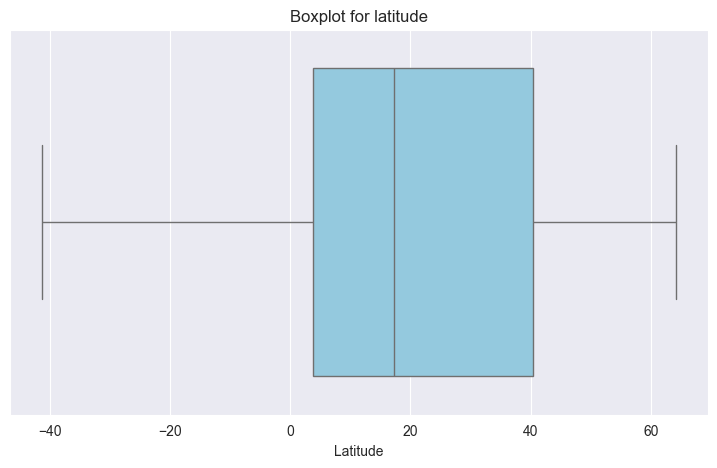


Analyzing 'longitude' column:


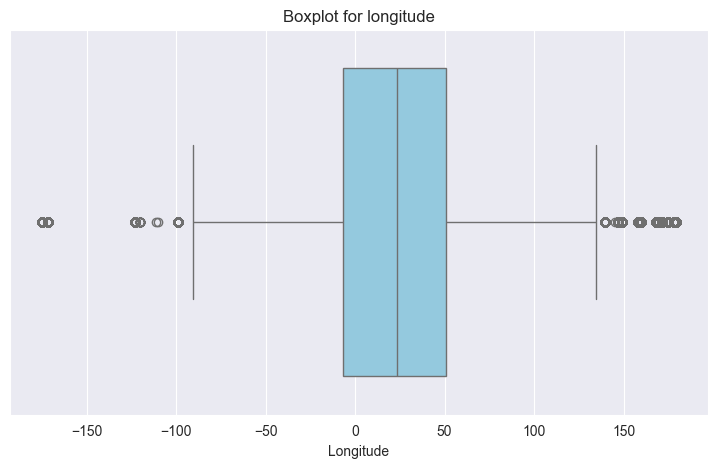


Analyzing 'last_updated_epoch' column:


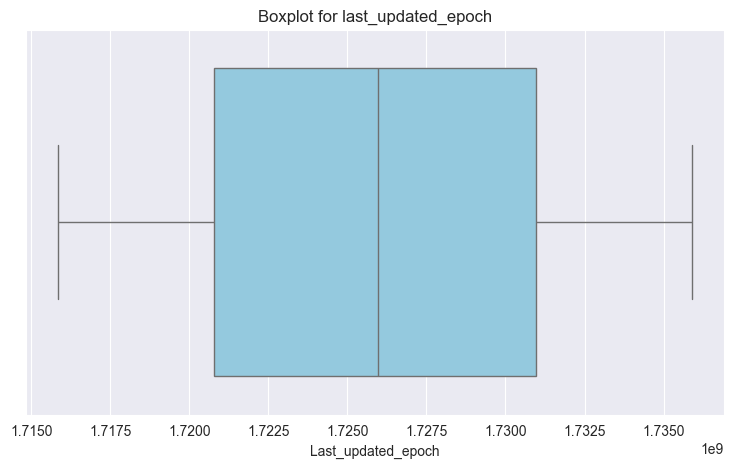


Analyzing 'temperature_celsius' column:


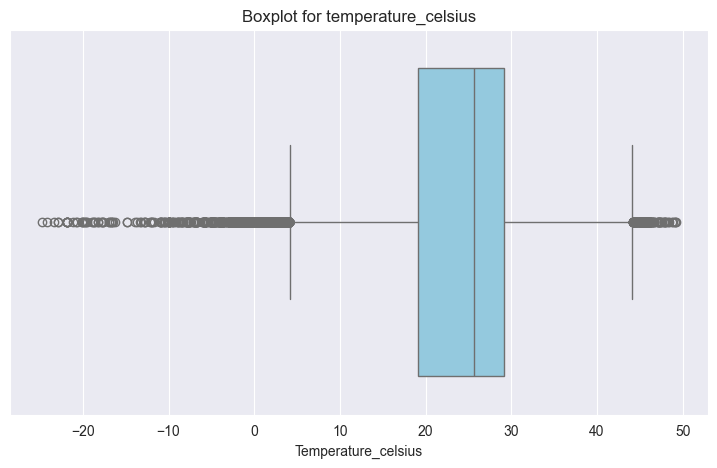


Analyzing 'wind_kph' column:


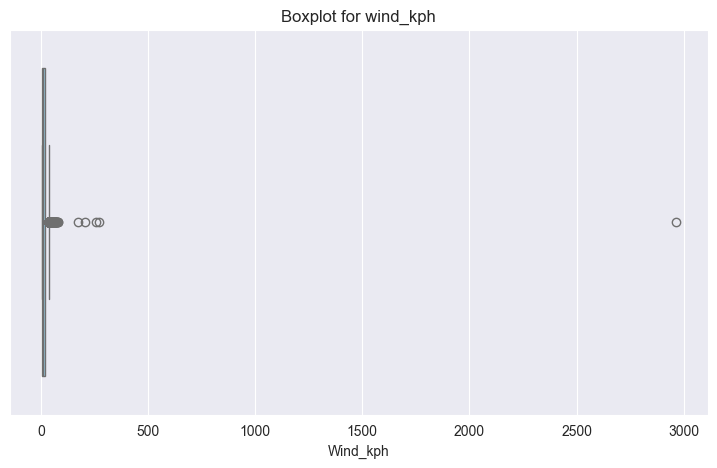


Analyzing 'wind_degree' column:


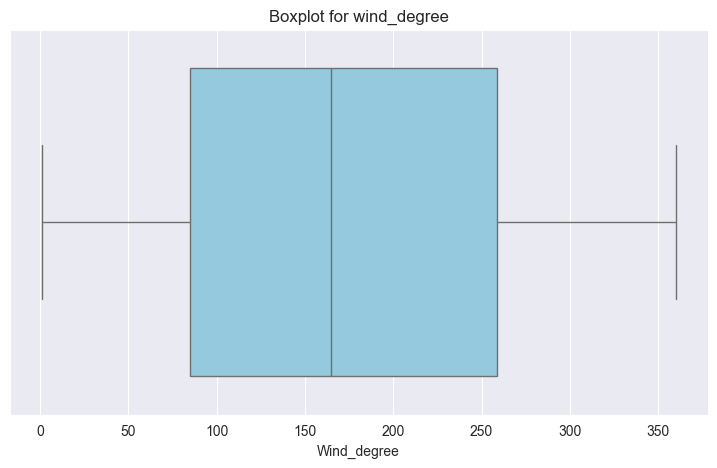


Analyzing 'pressure_mb' column:


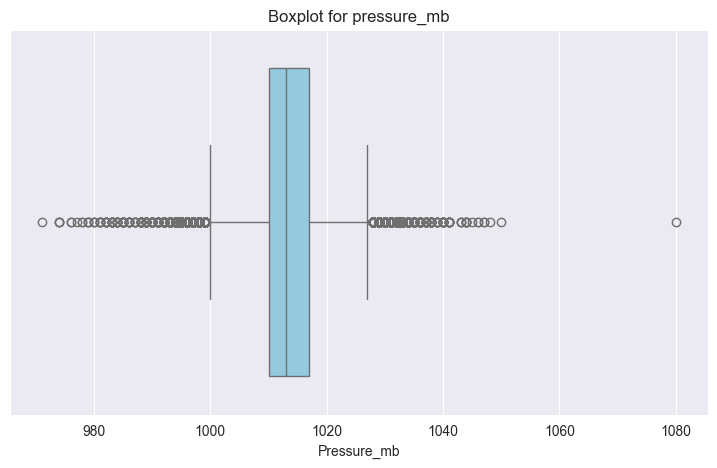


Analyzing 'precip_mm' column:


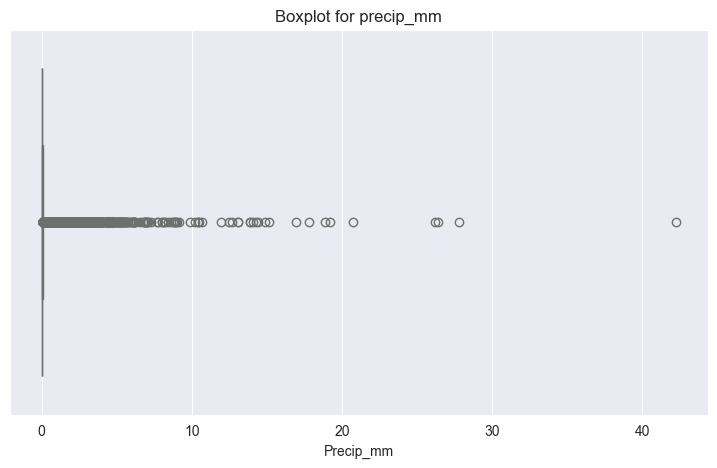


Analyzing 'humidity' column:


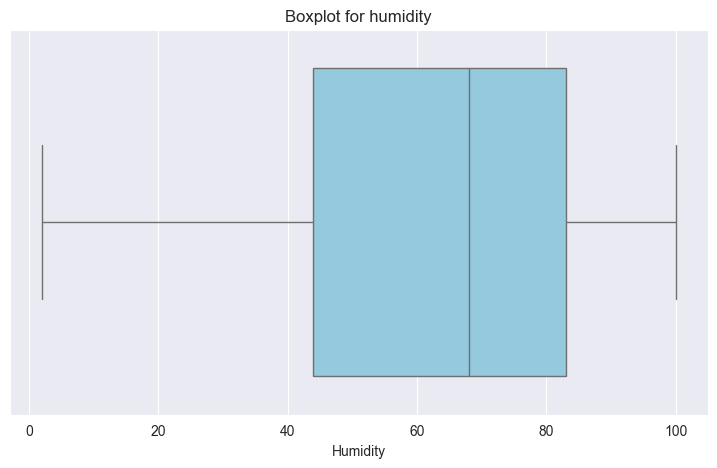


Analyzing 'cloud' column:


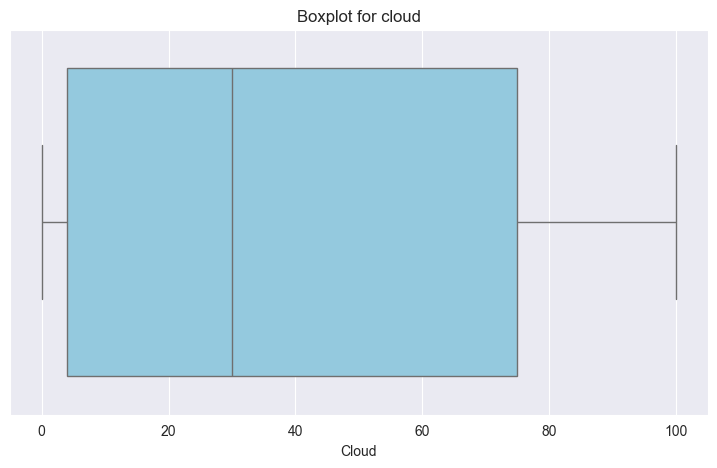


Analyzing 'feels_like_celsius' column:


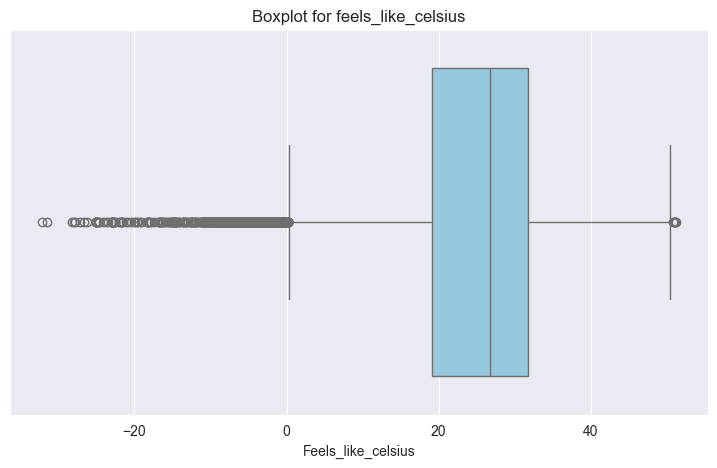


Analyzing 'visibility_km' column:


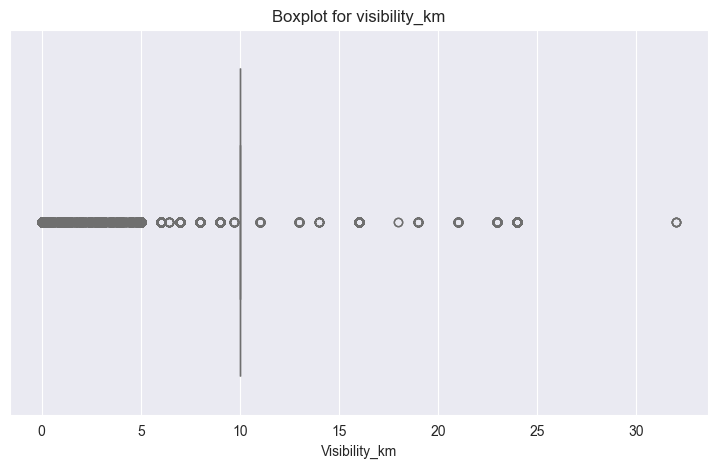


Analyzing 'uv_index' column:


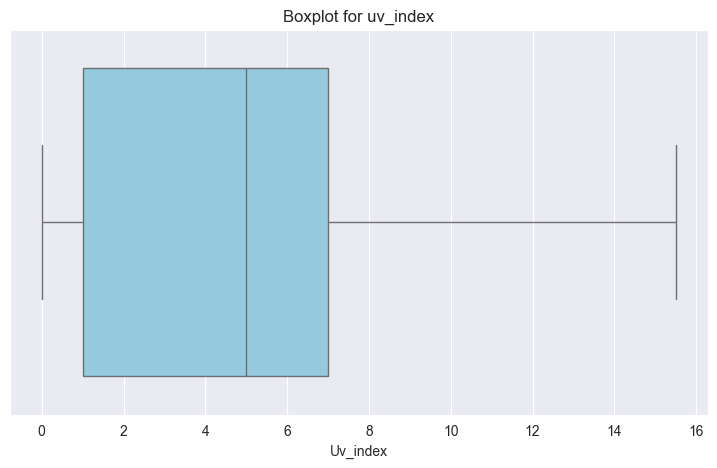

In [37]:
# Plot the BoxPlots for visualize after imputation
for column in numeric_columns:
  print(f"\nAnalyzing '{column}' column:")
      
  plt.figure(figsize=(9, 5))
  sns.boxplot(x=df[column], color="skyblue")
  plt.title(f"Boxplot for {column}")
  plt.xlabel(column.capitalize())
  plt.show()

### Mean Imputation for Outliers
We've imputed extreme outliers while keeping the ones with possibility to cluster.


Analyzing 'latitude' column after outlier imputation:


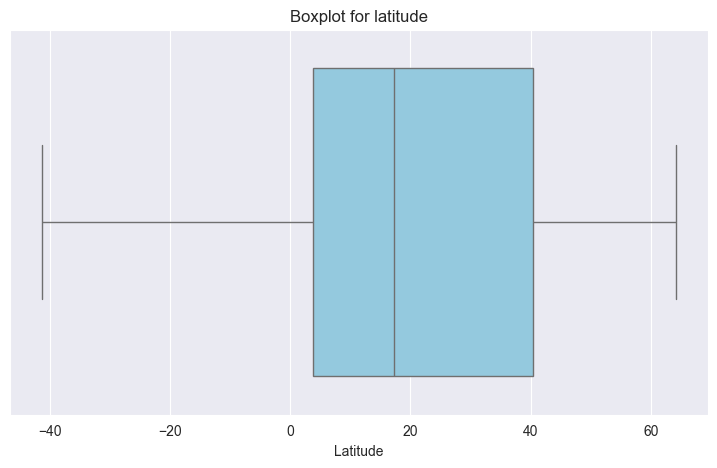


Analyzing 'longitude' column after outlier imputation:


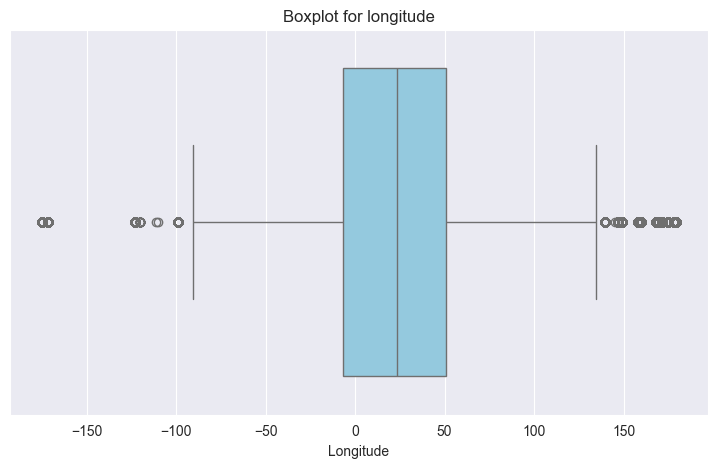


Analyzing 'last_updated_epoch' column after outlier imputation:


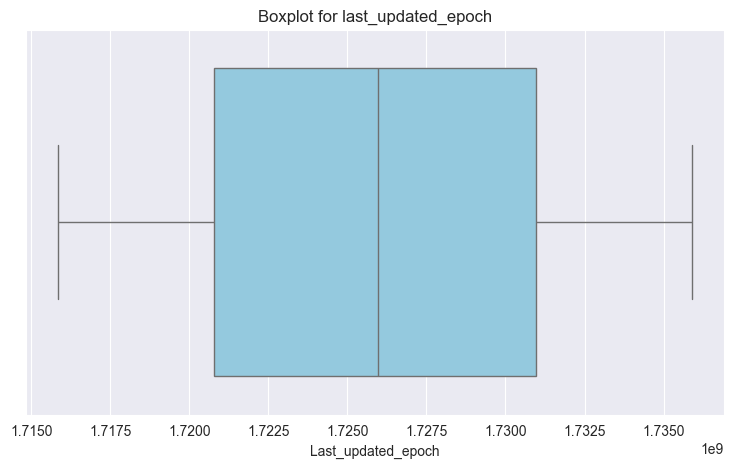


Analyzing 'temperature_celsius' column after outlier imputation:


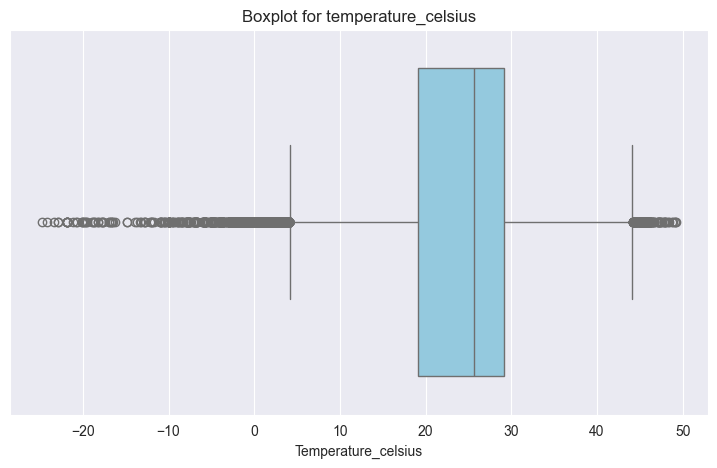


Analyzing 'wind_kph' column after outlier imputation:


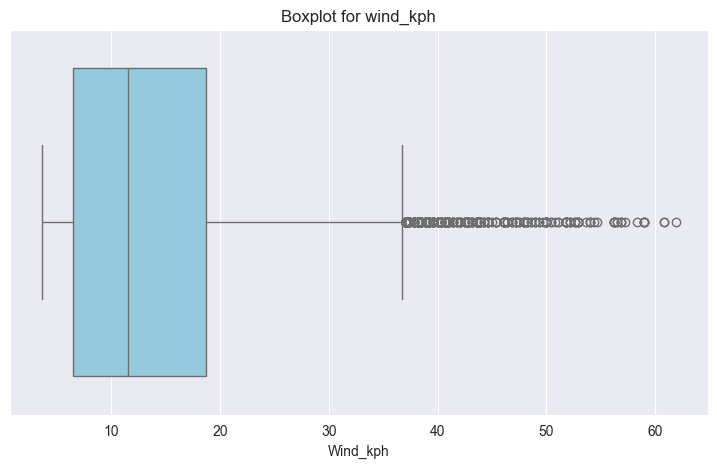


Analyzing 'wind_degree' column after outlier imputation:


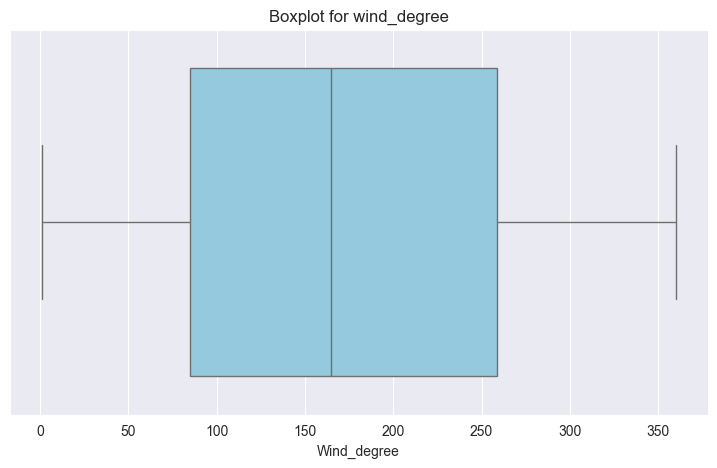


Analyzing 'pressure_mb' column after outlier imputation:


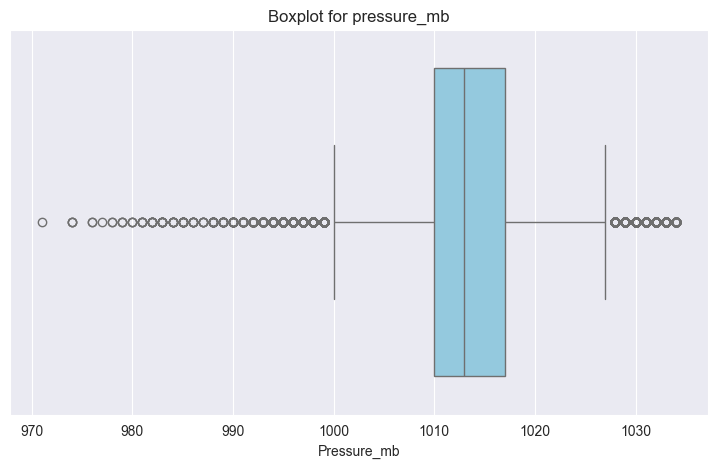


Analyzing 'precip_mm' column after outlier imputation:


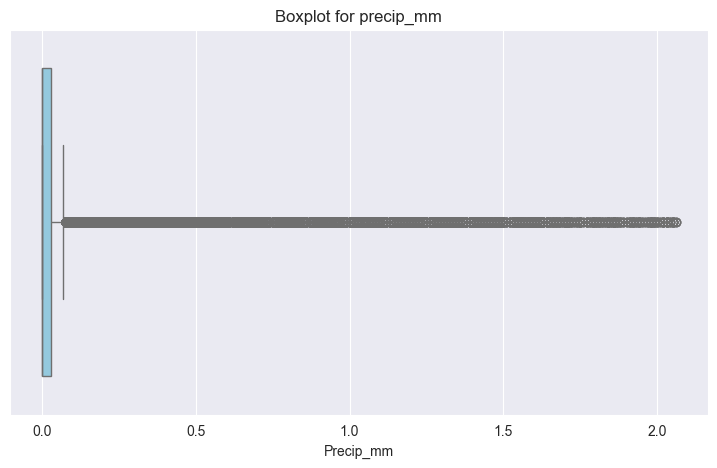


Analyzing 'humidity' column after outlier imputation:


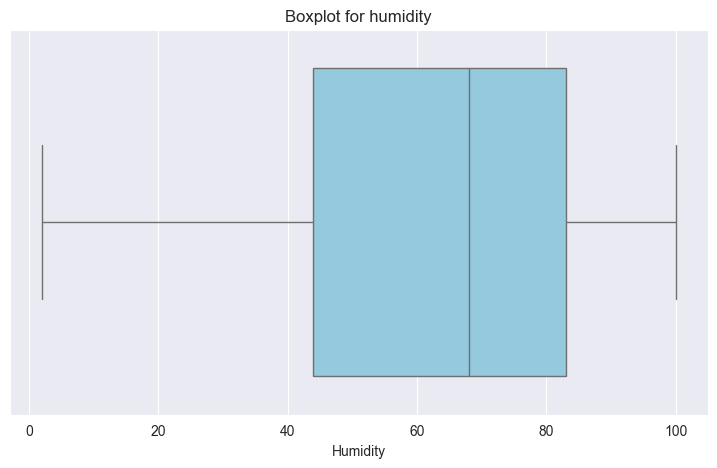


Analyzing 'cloud' column after outlier imputation:


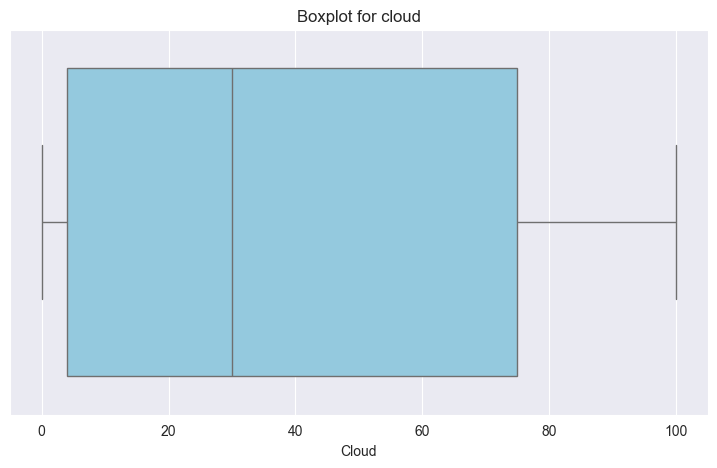


Analyzing 'feels_like_celsius' column after outlier imputation:


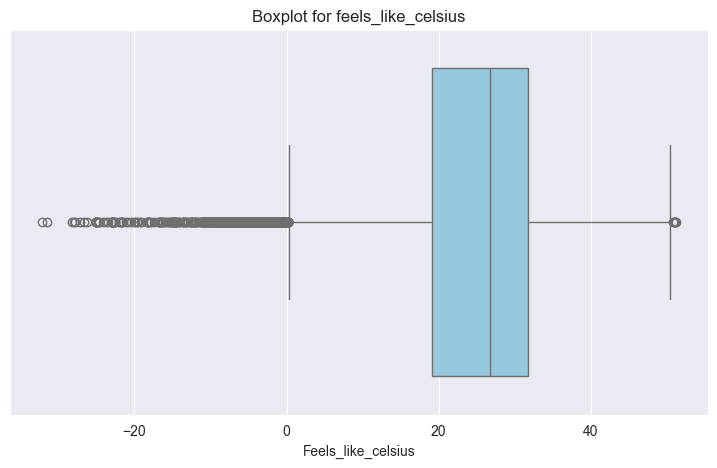


Analyzing 'visibility_km' column after outlier imputation:


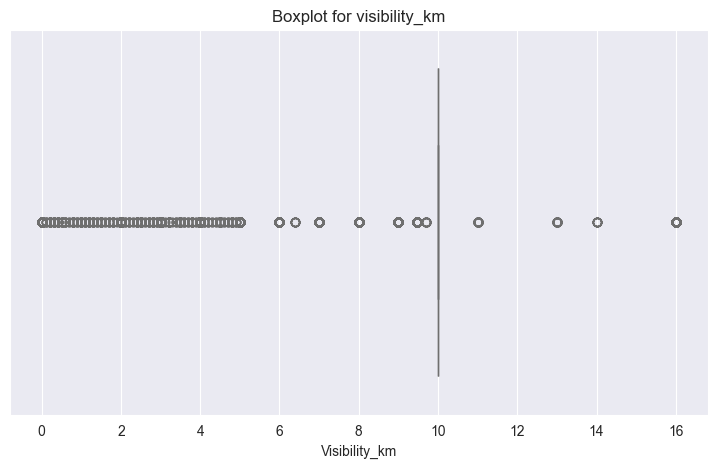


Analyzing 'uv_index' column after outlier imputation:


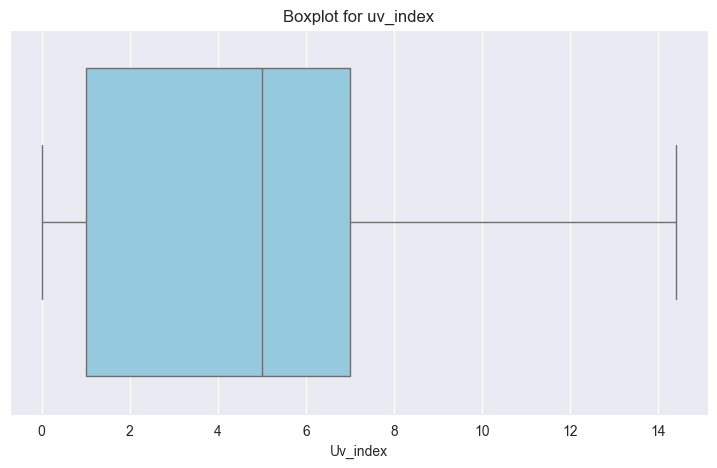

In [38]:
# Z-score detect and mean imputation for outliers not to lose clustering outliers while smoothing extreme ones
z_scores = stats.zscore(df[numeric_columns])
df[numeric_columns] = df[numeric_columns].where(z_scores < 3)
df.fillna(df[numeric_columns].mean(),inplace=True)

# Plot the boxplot for visualize after imputation
for column in numeric_columns:
  print(f"\nAnalyzing '{column}' column after outlier imputation:")
  
  plt.figure(figsize=(9, 5))
  sns.boxplot(x=df[column], color="skyblue")
  plt.title(f"Boxplot for {column}")
  plt.xlabel(column.capitalize())
  plt.show()

In [39]:
# Normalize the 'condition_text' column by converting all text to lowercase in order to provide data consistency
df['condition_text'] = df['condition_text'].str.lower()

# Group all detailed conditions into a single general category
df.loc[df['condition_text'] == "patchy light rain in area with thunder", 'condition_text'] = "patchy light rain with thunder"
df.loc[df['condition_text'].str.contains('snow|sleet|blizzard'), 'condition_text'] = "snow"
df.loc[df['condition_text'].str.contains('rain|drizzle'), 'condition_text'] = "rain"
df.loc[df['condition_text'].str.contains('mist|fog'), 'condition_text'] = "foggy"
df.loc[df['condition_text'].str.contains('thundery'), 'condition_text'] = "thundery"

print(df['condition_text'].unique())

['partly cloudy' 'sunny' 'rain' 'clear' 'overcast' 'foggy' 'cloudy'
 'thundery' 'snow']


In [40]:
# Encodings

# Label encoding for 'condition_text':
# NOTE: We know that labeling is not proper for this categorical variable which does not have inherent order (Distance calculation is not same for all values where it should be same). However, since there are more than 250 values, we tested label encoding and result were almost same as one-hot encoding. Thus not to increase time complexity we did not used one-hot encoding.

# Converts the categorical weather conditions into numeric labels,
# which is essential for machine learning models that only accept numeric inputs.
label_encoder = LabelEncoder()
df['condition_text'] = label_encoder.fit_transform(df['condition_text'])
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
print(label_mapping)
df["location"] = label_encoder.fit_transform(df["location"])

# Sin-Cos Encoding for 'wind_direction':
# Converts the 'wind_degree' feature into a continuous and cyclic format.
# This ensures that the circular nature of directions (e.g., 0° and 360°) is properly represented.
df["wind_degree"] = np.sin(2 * np.pi * df["wind_degree"] / 360)

# Minute Encoding for 'sunrise' and 'sunset':
# Time is converted into minutes since midnight for simplicity and processed using trigonometric encoding,
# which captures the nature of time.
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str[:-3].split(":"))
    if "PM" in time_str and hours != 12:
        hours += 12
    if "AM" in time_str and hours == 12:
        hours = 0
    return hours * 60 + minutes

# Apply time_to_minutes function on sunrise and sunset
df["sunrise"] = df["sunrise"].apply(time_to_minutes)
df["sunset"] = df["sunset"].apply(time_to_minutes)

df.head()

{0: 'clear', 1: 'cloudy', 2: 'foggy', 3: 'overcast', 4: 'partly cloudy', 5: 'rain', 6: 'snow', 7: 'sunny', 8: 'thundery'}


latitude  longitude  last_updated_epoch  temperature_celsius  \
0     34.52      69.18          1715849100                 26.6   
1     41.33      19.82          1715849100                 19.0   
2     36.76       3.05          1715849100                 23.0   
3     42.50       1.52          1715849100                  6.3   
4     -8.84      13.23          1715849100                 26.0   

   condition_text  wind_kph  wind_degree  pressure_mb  precip_mm  humidity  \
0               4      13.3    -0.374607       1012.0        0.0        24   
1               4      11.2    -0.642788       1012.0        0.1        94   
2               7      15.1    -0.984808       1011.0        0.0        29   
3               5      11.9    -0.573576       1007.0        0.3        61   
4               4      13.0     0.500000       1011.0        0.0        89   

   cloud  feels_like_celsius  visibility_km  uv_index  sunrise  sunset  \
0     30                25.3           10.0       7.0      290    1130   
1     75                19.0           10.0       5.0      321    1194   
2      0                24.6           10.0       5.0      340    1190   
3    100                 3.8            2.0       2.0      391    1271   
4     50                28.7           10.0       8.0      372    1075   

   location  
0         0  
1         1  
2         2  
3         3  
4         4

#### Correlation Heatmap

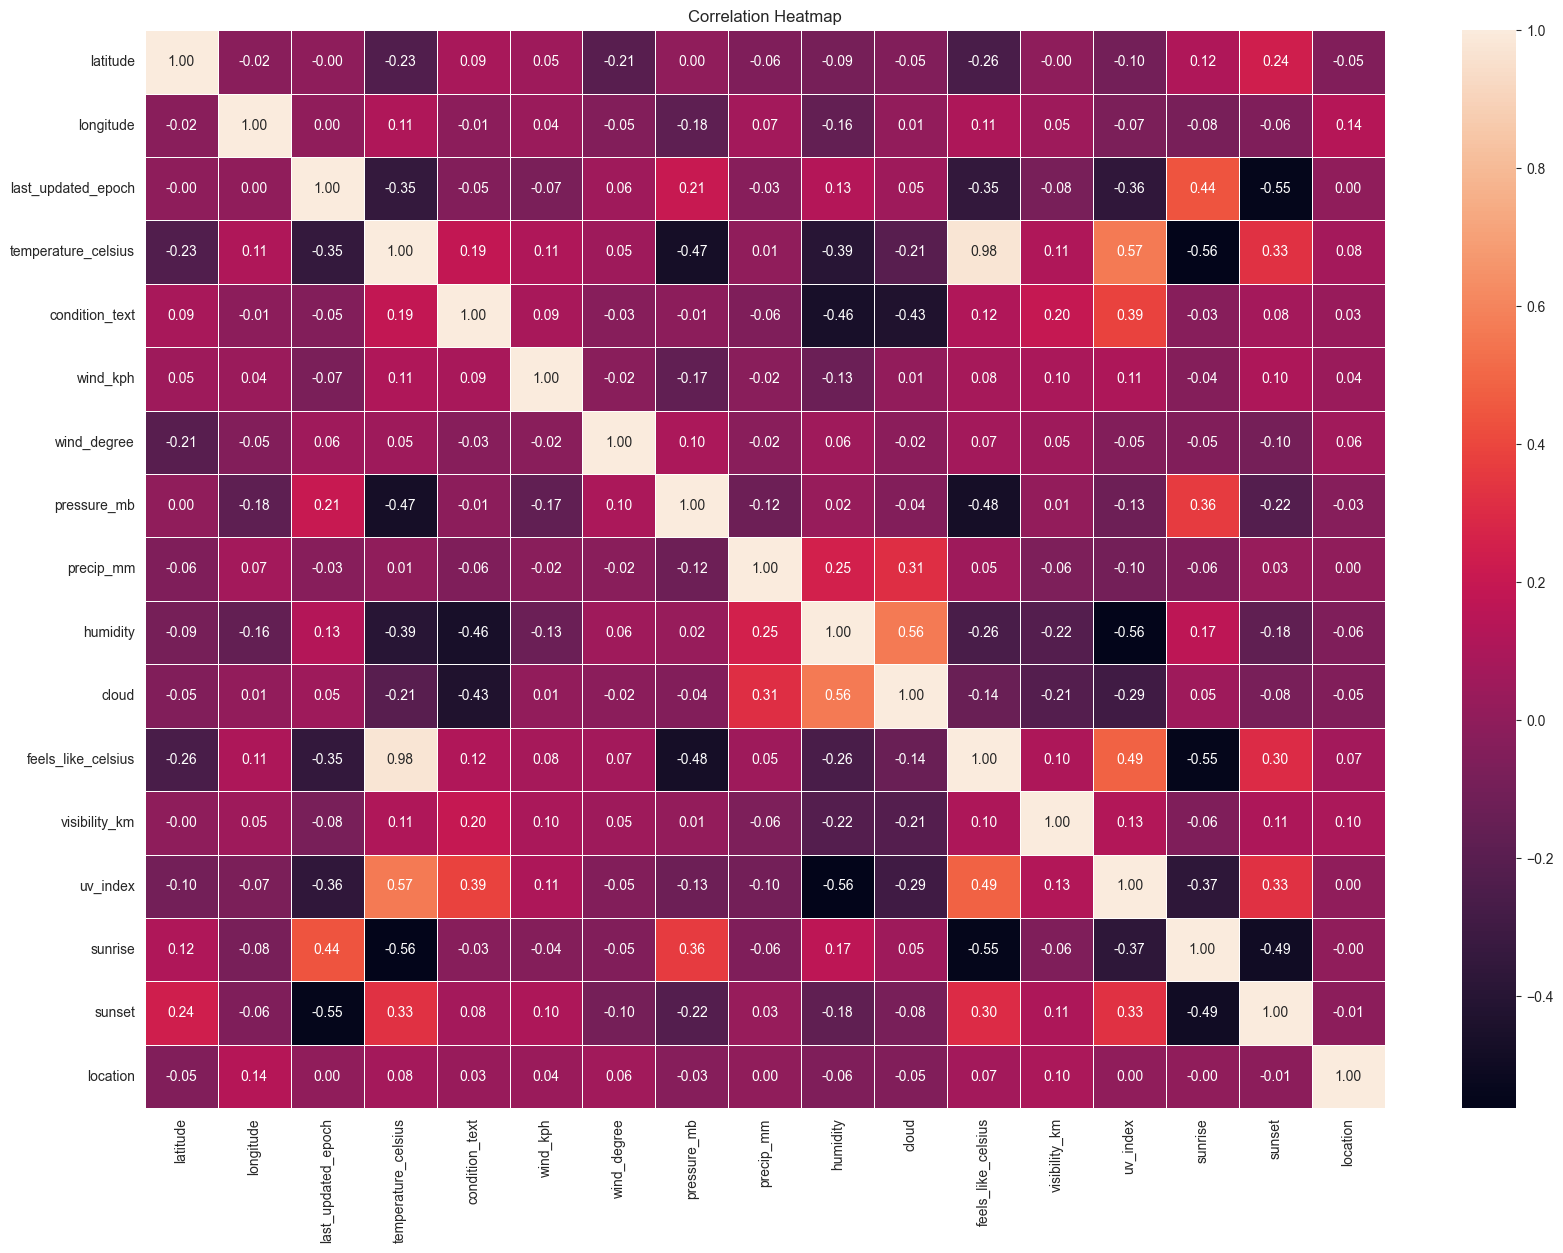

In [41]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Heatmap Analysis

1. **Temperature Variables**:
   - 'temperature_celsius' has a very strong positive correlation with 'feels_like_celsius' (0.97),
     which is expected since the "feels like" temperature is derived from the actual temperature.
   - There is also a moderate negative correlation between 'temperature_celsius' and 'humidity' (-0.46),
     indicating that higher temperatures tend to occur in less humid conditions.

2. **Humidity and Cloud Cover**:
   - 'humidity' shows a moderate positive correlation with 'cloud' (0.56),
     which makes sense because higher humidity levels often lead to cloud formation.

3. **Visibility and Humidity**:
   - A negative correlation exists between 'visibility_km' and 'humidity' (-0.57),
     suggesting that higher humidity can reduce visibility, possibly due to fog or mist.

4. **Sunrise, Sunset, and Latitude**:
   - 'sunrise' and 'sunset' show a moderate positive correlation with 'latitude' (0.30 for sunset),
     indicating that the timing of these events varies based on geographical location.

5. **Condition Text (Encoded)**:
   - 'condition_text' shows moderate correlations with 'location' (0.54) and 'temperature_celsius' (0.19),
     suggesting that certain weather conditions are associated with specific locations and temperatures.

6. **Pressure and Temperature**:
   - 'pressure_mb' has a moderate negative correlation with 'temperature_celsius' (-0.47),
     indicating that lower pressure often accompanies higher temperatures.

7. **General Observations**:
   - Variables like 'latitude', 'longitude', and 'last_updated_epoch' have low correlations with most features,
     suggesting they might not directly influence the primary variables in this dataset.

8. **Next Steps**:
   - Highly correlated features like 'temperature_celsius' and 'feels_like_celsius' can lead to multicollinearity issues.
     One of them could be removed to simplify the model or PCA can be done.
   - Features with low correlations (e.g., 'longitude') may be less impactful and could be excluded during modeling.
   - The strong correlations between some features (e.g., 'humidity' and 'cloud') could be further explored to derive new insights.



Analyzing 'latitude' column:


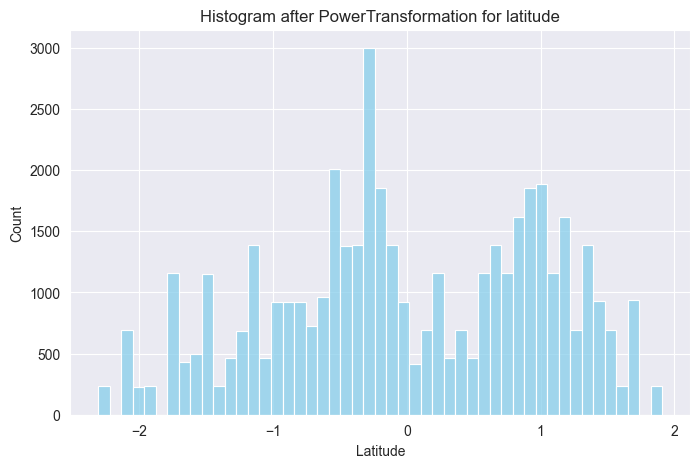


Analyzing 'longitude' column:


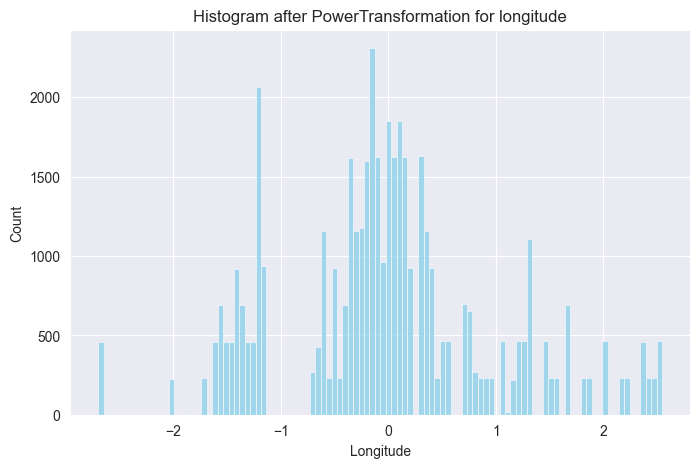


Analyzing 'last_updated_epoch' column:


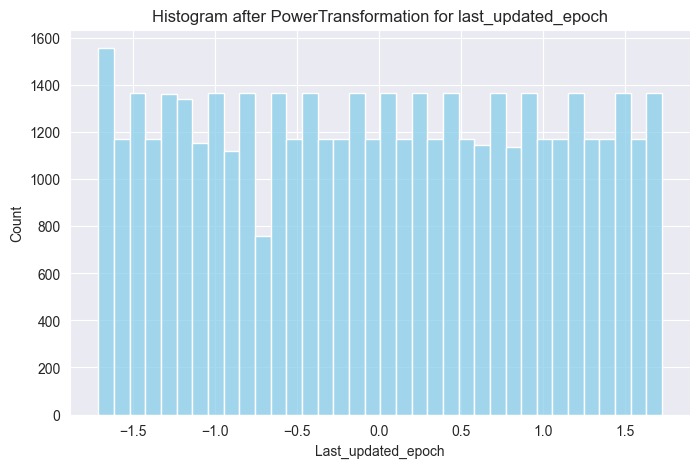


Analyzing 'temperature_celsius' column:


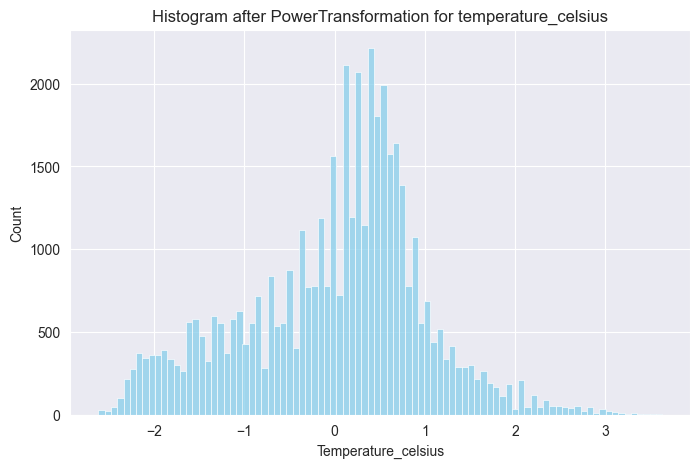


Analyzing 'wind_kph' column:


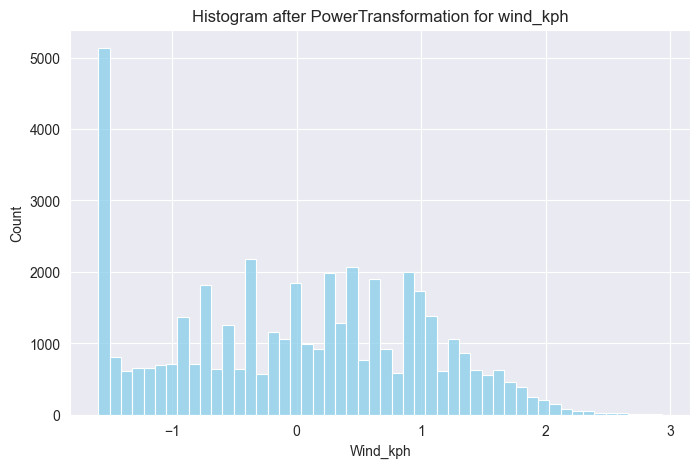


Analyzing 'wind_degree' column:


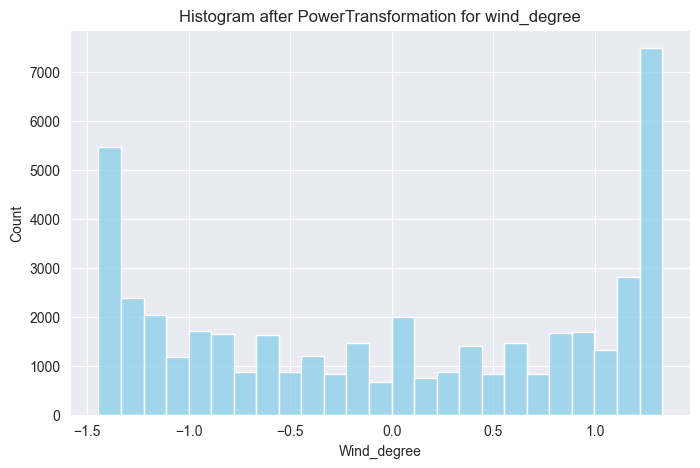


Analyzing 'pressure_mb' column:


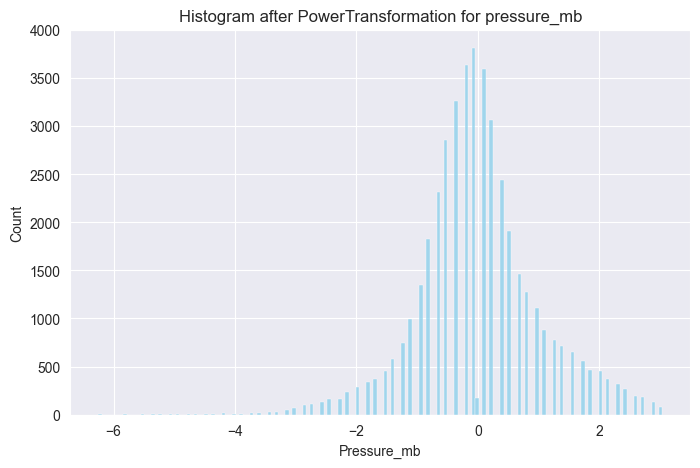


Analyzing 'precip_mm' column:


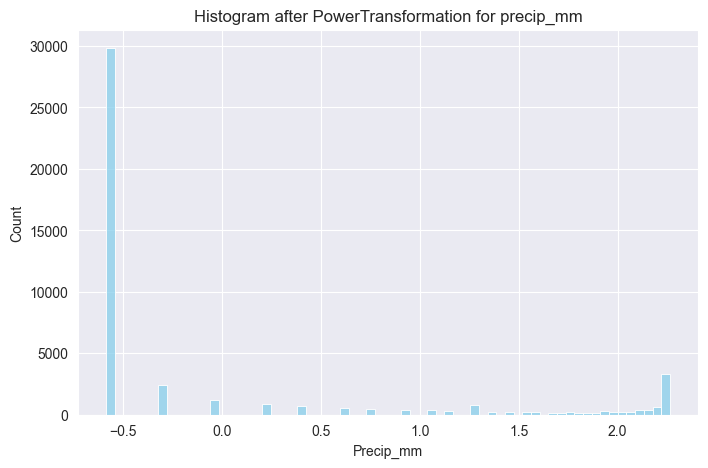


Analyzing 'humidity' column:


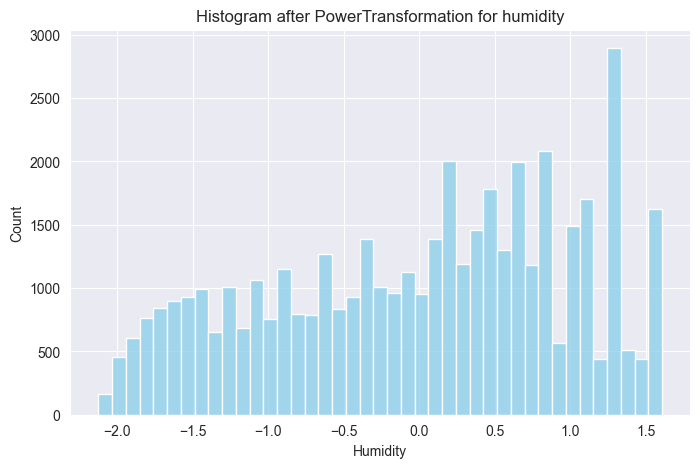


Analyzing 'cloud' column:


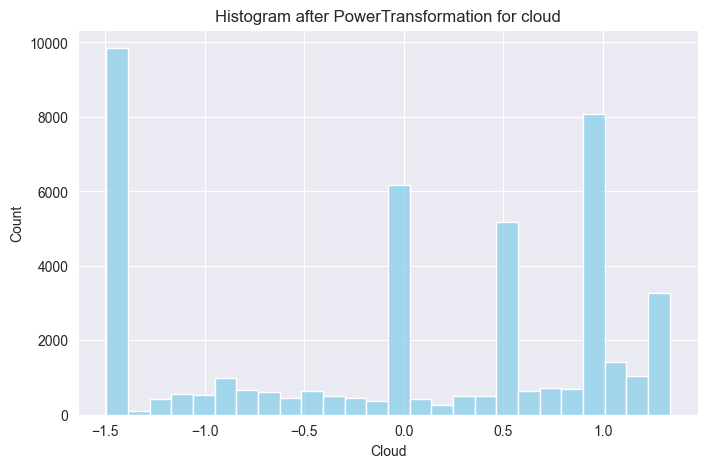


Analyzing 'feels_like_celsius' column:


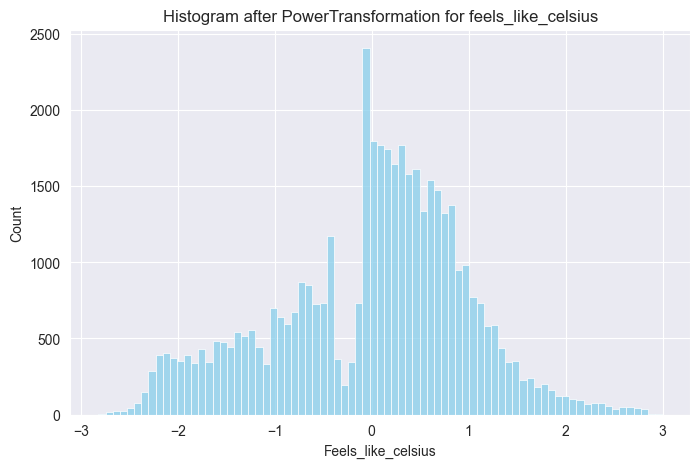


Analyzing 'visibility_km' column:


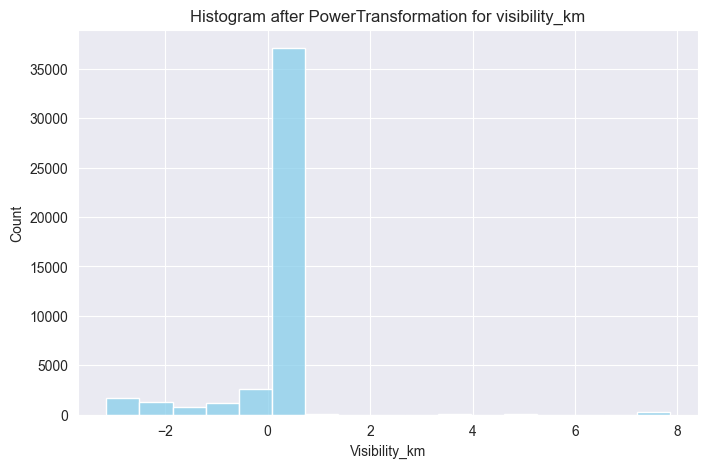


Analyzing 'uv_index' column:


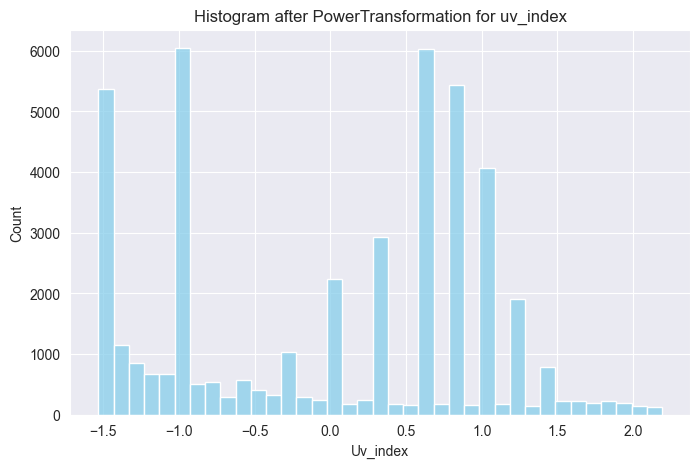

In [42]:
pc = PowerTransformer(standardize=True)
pc.set_output(transform="pandas")

# Power Transformation Applied
# To improve data efficiency and bring it closer to a standard distribution, a power transform has been applied to the dataset.
# After the power transform, the data has successfully approximated a standard distribution, enhancing its usability for machine learning models.

# Applying power transform accuracy is improved approximately 5-10% percent. It is important to use power transform after z-score detection, as we did not delete all outliers and tails left.

df[numeric_columns] = pc.fit_transform(X=df[numeric_columns])

for column in numeric_columns:
    print(f"\nAnalyzing '{column}' column:")


    plt.figure(figsize=(8, 5))
    sns.histplot(x=df[column], color="skyblue")
    plt.title(f"Histogram after PowerTransformation for {column}")
    plt.xlabel(column.capitalize())
    plt.show()

Clustering Analyzing Using  PCA
The reason for choosing PCA from the Prince library over the standard PCA from sklearn is multifaceted:
1. Visualization: Prince's PCA provides better visualization capabilities, making it easier to interpret and understand the results.
2. Quality of PCA Components: The PCA components generated by Prince are often more robust and reliable, leading to healthier and more meaningful components.
3. Model Performance: Models trained after dimensionality reduction using Prince's PCA tend to perform better.
This is because the components are more representative of the underlying data structure, leading to improved model accuracy and generalization.

The reason for selecting the number of PCA components equal to the number of columns in the dataset is to ensure that the data is represented in the best possible way.
By choosing the same number of components as the original columns, we retain all the variance present in the data.
This approach helps in preserving the original information while transforming the data into a new space defined by the principal components.
Then we will choose the best PCA components Number for our Data.

In [43]:
Pca = PCA(n_components=df.shape[1],n_iter=100,engine="sklearn",random_state=17)
Pca_Checker = Pca.fit(df)

The reason for selecting the best PCA value using Eigenvalues is to ensure that the data is represented in the most efficient way.
Eigenvalues help us determine the amount of variance captured by each principal component.
By plotting the Eigenvalues, we can identify the "elbow point," which indicates the optimal number of components to retain.
This approach helps in preserving the most important information while reducing the dimensionality of the data.

In [44]:
EV = pd.DataFrame()
EV["Pca"] = range(1,df.shape[1]+1)
EV["EigenValues"] = pd.DataFrame(Pca_Checker.eigenvalues_)

 The plot of Eigenvalues for PCA components shows significant changes in slope at the 4th and 10th components.
These "elbow points" indicate where the rate of explained variance decreases sharply.
Identifying these points helps us determine the optimal number of components to retain.
By selecting components up to the 4th or 10th, we can capture most of the important variance in the data while reducing dimensionality.
This approach ensures that we preserve the most meaningful information, leading to better model performance and interpretability.

Text(0.5, 0, 'PCA')

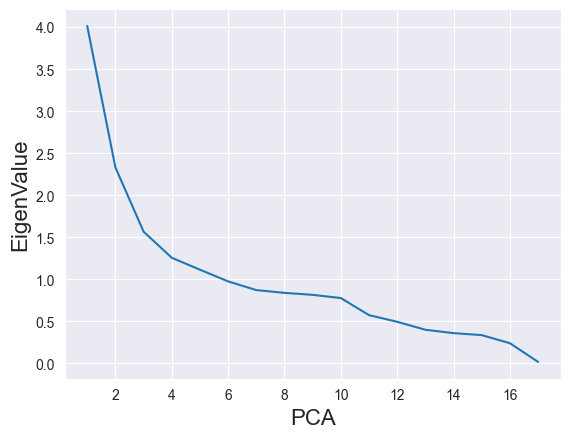

In [45]:
plt.Figure(figsize=(8,6))
sns.lineplot(x="Pca" , y="EigenValues" , markers="o" , data=EV)
plt.ylabel("EigenValue" , fontsize = 16)
plt.xlabel("PCA" , fontsize =16)

The cumulative explained variance plot helps us determine the optimal number of PCA components to retain.
By plotting the cumulative explained variance, we can see how much of the total variance is captured as we add more components.
The "elbow point" in the scree plot indicates the number of components where adding more components yields diminishing returns in terms of explained variance.
This approach ensures that we capture the most important variance in the data while reducing dimensionality.

In [46]:
explained_variences = Pca_Checker.cumulative_percentage_of_variance_

EVR = pd.DataFrame()

EVR["PCA"] = range(1,df.shape[1])
EVR["VARS"] = pd.DataFrame(explained_variences)

The plot helps us visualize the cumulative explained variance for each principal component.
The "elbow points" at the 4th and 10th components indicate significant changes in slope.
These points help us determine the optimal number of components to retain, ensuring we capture the most important variance in the data.
Additionally, the elbow points at the 4th and 10th components confirm the component selection based on Eigenvalues.
This dual confirmation strengthens our decision to retain components up to the 10th, ensuring a robust and efficient representation of the data.

Text(0.5, 0, 'PCA')

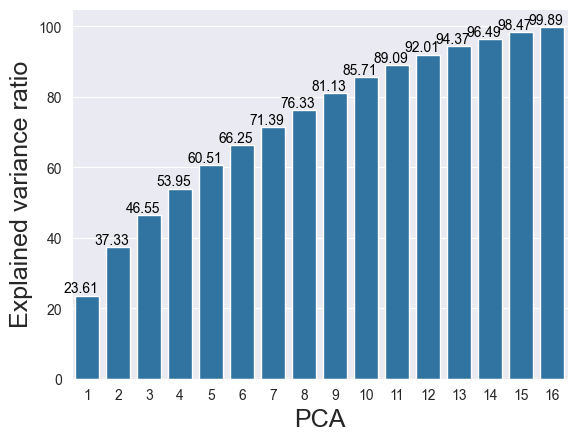

In [47]:
plt.Figure(figsize=(8,6))
graph = sns.barplot(x="PCA" , y="VARS" ,data=EVR )

for p in graph.patches:
    graph.annotate("{:.2f}".format(p.get_height()),(p.get_x()+0.2 ,p.get_height()),ha='center',va='bottom',color='black')
plt.ylabel("explained variance ratio".capitalize(),fontsize=18)
plt.xlabel("PCA" , fontsize =  18)

The PCA correlation matrix heatmap visualizes the relationships between the original features and the principal components.
Each cell in the heatmap represents the correlation coefficient between an original feature and a principal component.
This heatmap helps identify which original features contribute most to each principal component.
By examining the heatmap, we can understand how the original features are transformed into the new principal component space.
This information is useful for interpreting the principal components and understanding the underlying structure of the data.
Also, using this information, we can reduce the features if they have no correlation with the important components, as they are not significant for the data.correlation = Pca_Checker.column_correlations

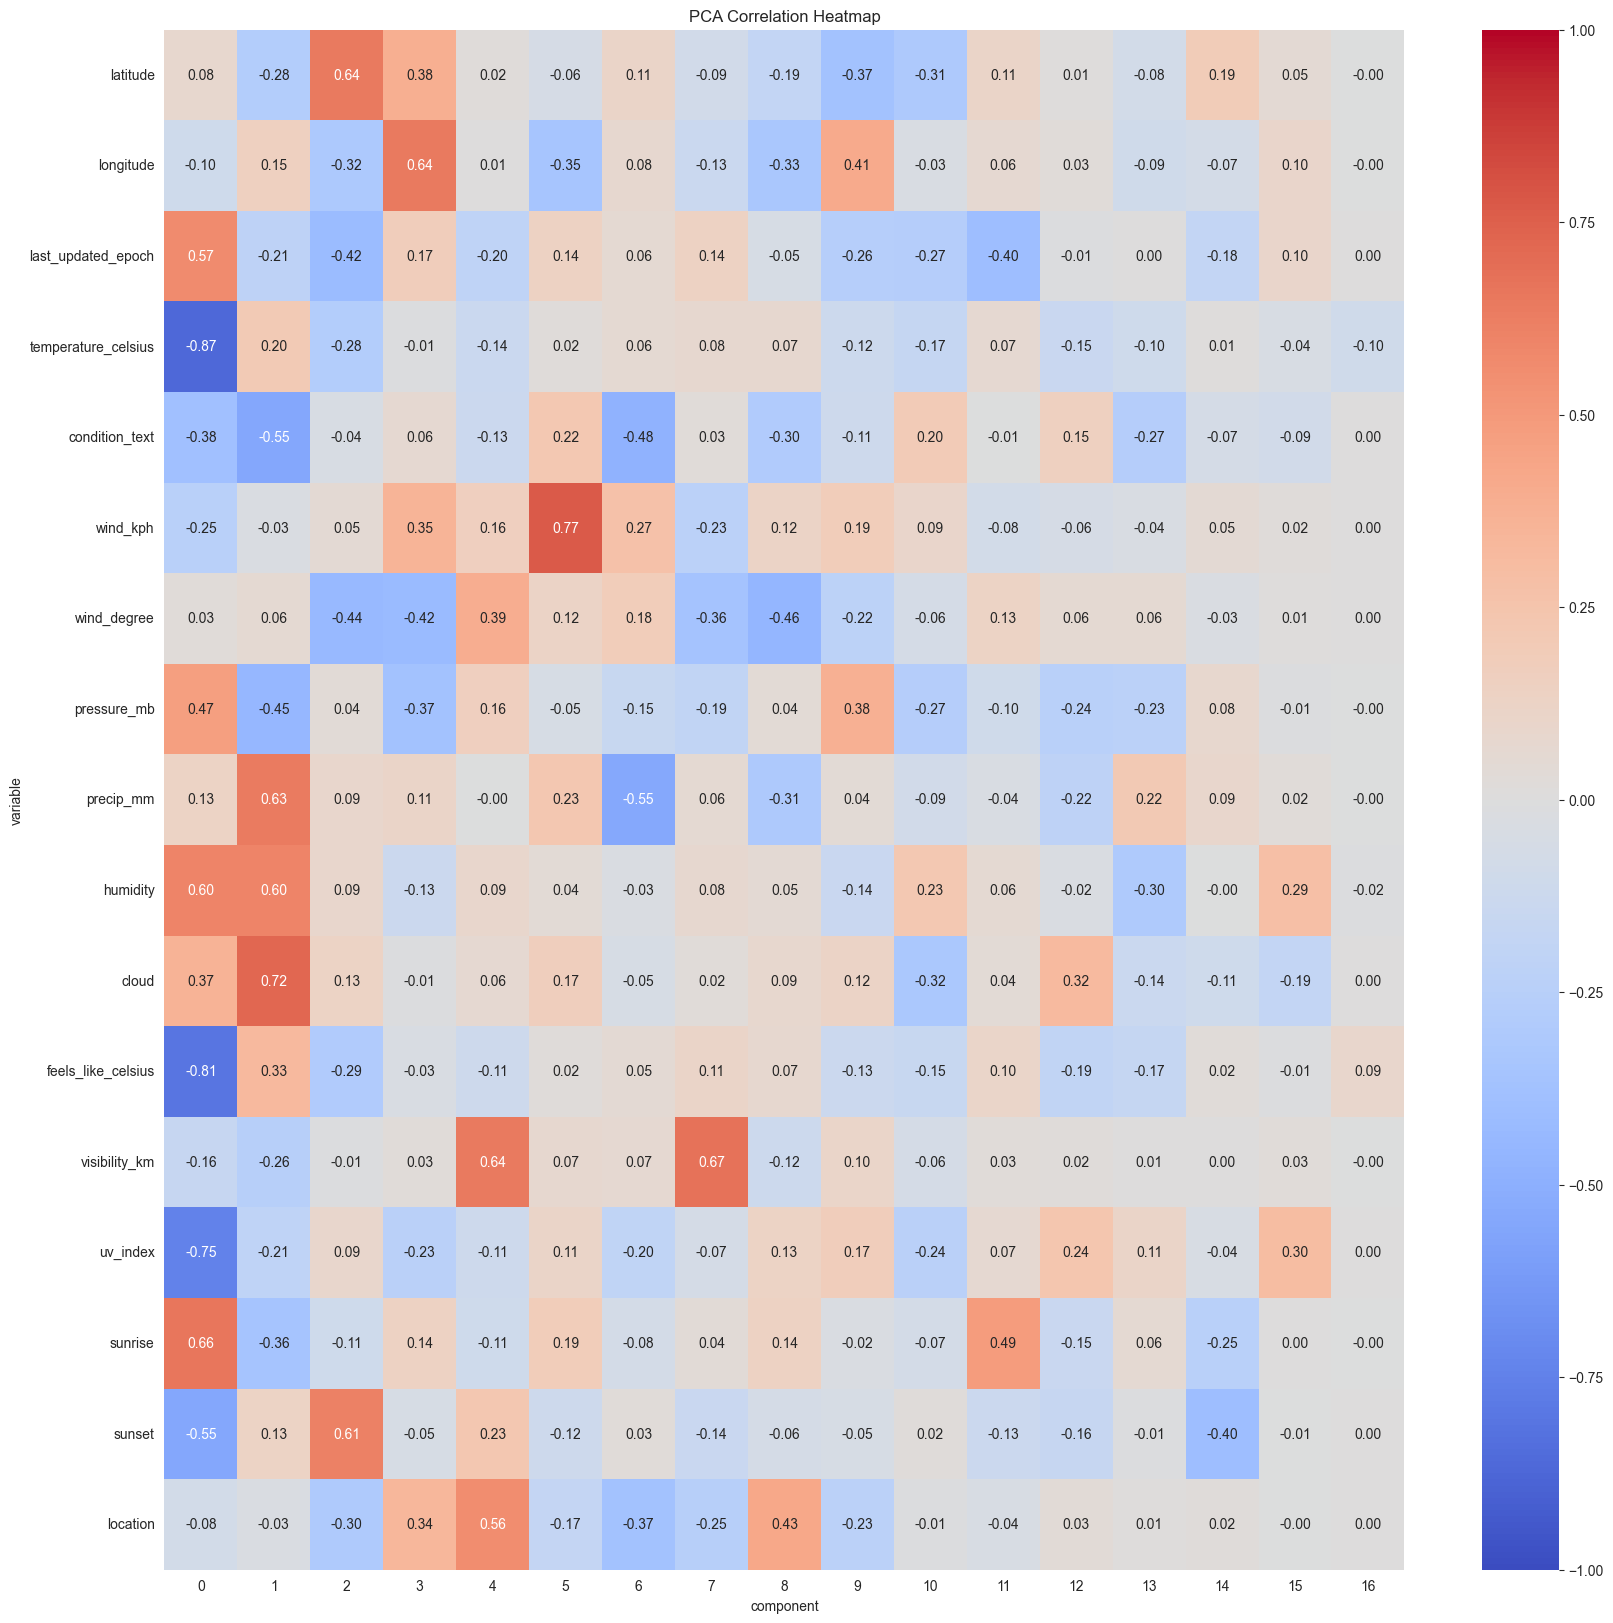

In [48]:
correlation = Pca_Checker.column_correlations

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True,cmap="coolwarm",vmax=1.0,vmin=-1.0,fmt=".2f")
plt.title("PCA Correlation Heatmap")
plt.show()

# After visualization, the data cannot be split from any feature because of the correlations.
# Therefore, we will continue with the original data and the new PCA data that will be introduced next.

We have chosen to retain 10 PCA components for our analysis.
This decision is based on the cumulative explained variance plot and the eigenvalue plot.
The cumulative explained variance plot shows that the first ten components capture a significant portion of the total variance.
By retaining these ten components, we ensure that we capture the most important range of variance in the data while reducing dimensionality.
This approach helps in preserving the original information and improving model performance.
Additionally, the elbow points in the eigenvalue plot confirm that selecting up to the first ten components is optimal.
This dual confirmation strengthens our decision to retain components up to the first ten, ensuring a robust and efficient representation of the data.

In [49]:
# Rules of Thumbs is used while choosing n_components
pca = PCA(n_components=10,n_iter=100,engine="sklearn",random_state=17)
pca.set_output(transform="pandas")
pca_df = pca.fit_transform(df[df.columns])

The scatter plot visualizes the data points in the new PCA space using the first two principal components.
Each point represents an observation in the dataset, plotted according to its values on the first and second principal components.
The plot helps us understand the distribution and clustering of the data in the reduced-dimensional space.
However, the clustering of the data points is not very clear, indicating that the data does not form distinct clusters in this PCA space.
This lack of clear clustering suggests that the first two principal components  not capture all the underlying structure of the data.
Further analysis with additional components or different clustering techniques might be necessary to uncover more distinct patterns.

Text(0, 0.5, 'PC 2')

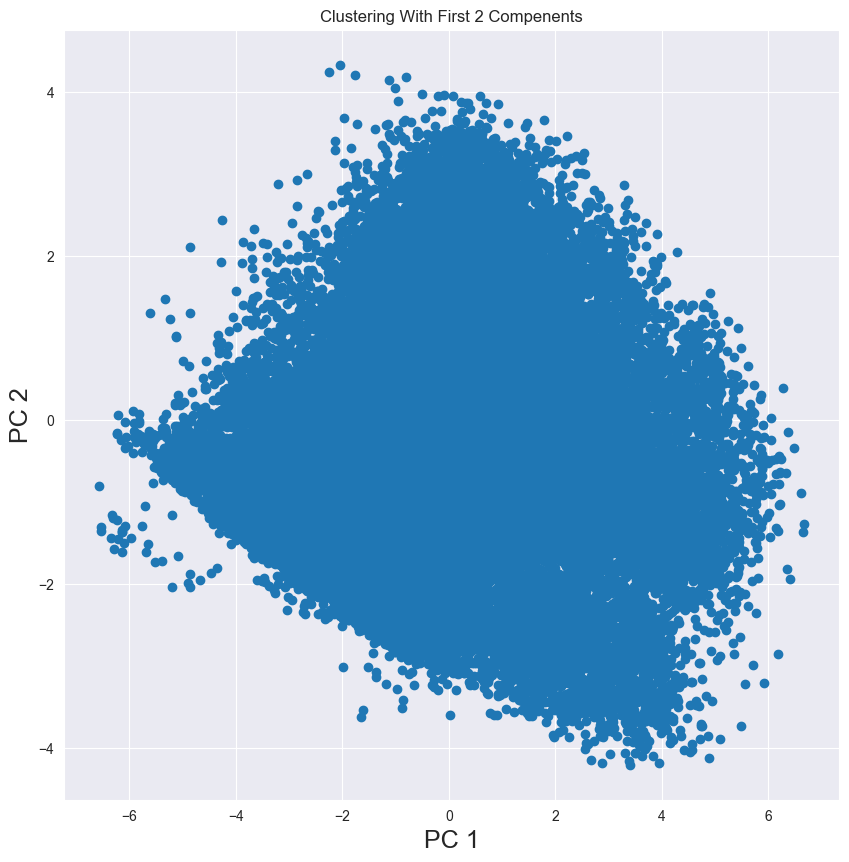

In [50]:
plt.figure(figsize=(10,10))
plt.title(label="Clustering With First 2 Compenents")
plt.scatter(pca_df[pca_df.columns[0]],pca_df[pca_df.columns[1]],marker="o")
plt.xlabel(xlabel="PC 1" ,fontsize = 18)
plt.ylabel(ylabel="PC 2" ,fontsize = 18)

# Distortion Plot Analysis

The distortion curve shows a steep drop initially, indicating that increasing the number of clusters
significantly reduces within-cluster distances. However, after k = 5, the rate of reduction slows down,
suggesting diminishing returns. This "elbow" around k = 5 is often an indicator of the optimal number
of clusters.

Interestingly, a second elbow is visible around k = 15. This suggests that while k = 5 is the most
efficient choice in terms of simplicity, k = 15 may provide a finer-grained clustering if the added
complexity is acceptable.

# Observations:
1. The choice of k between 5 and 15 depends on the specific requirements of the analysis.
2. If interpretability and simplicity are prioritized, k = 5 is a better choice.
3. If more detailed clustering is needed, k = 15 could be explored.

# Limitations:
1. There may still be non-clustered classes in the dataset, leading to potential misclassification.
2. Further analysis is required to determine whether these clusters are meaningful or represent noise.

# Recommendations:
1. Perform additional validation (e.g., silhouette score) to confirm the optimal number of clusters.
2. Visualize the clusters in reduced dimensions to assess their separability.
3. Consider the application context when selecting k, balancing interpretability and accuracy.

the Optimal k is around 5 and 15


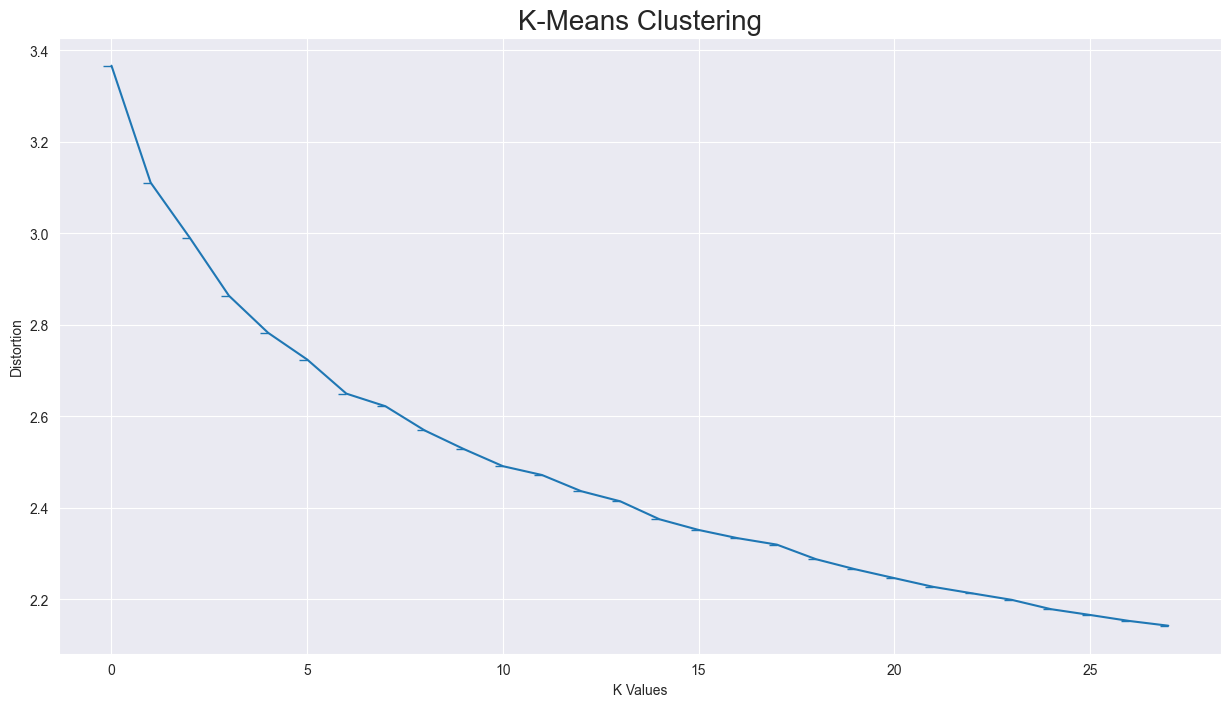

In [51]:
# Applying KMeans models and compare it from elbow method
distortion = []
feature_values = pca_df.values
for k in range(2,30):
    model = KMeans(n_clusters= k , max_iter= 1000,random_state=212).fit(pca_df)
    distortion.append(sum(np.min(cdist(feature_values,
    model.cluster_centers_, 'euclidean'),axis=1)) /
    feature_values.shape[0])

plt.figure(figsize=(15,8))
plt.xlabel(xlabel=" K Values ")
plt.ylabel(ylabel= "Distortion")
plt.title('K-Means Clustering', fontsize = 20)
plt.plot(distortion , marker = 0)

print("the Optimal k is around 5 and 15")

In [52]:
# Split Dataset train and test parts
test_set_x = df.loc[42520:]
df = df.loc[:42520]

# Predictors and target variables
train_set_y = df["condition_text"]
train_set_x = df.drop(columns=["condition_text", "location"])

test_set_y = test_set_x["condition_text"]
test_set_x = test_set_x.drop(columns=["condition_text", "location"])

# Predictors using PCA

pca = PCA(n_components=10,n_iter=100,engine="sklearn",random_state=17)
pca.set_output(transform="pandas")
train_x_pca = pca.fit_transform(train_set_x[train_set_x.columns])

In [53]:
def print_results(cross_val_scores,cross_val_originals):
    """Print the accuracy and cross-validation scores"""

    print("Max Cross-Validation Score (PCA Applied):", np.max(cross_val_scores))
    print("Mean Accuracy:", np.mean(cross_val_scores))
    print()
    print("Max Cross-Validation Score (Original Data Set):", np.max(cross_val_originals))
    print("Mean Accuracy: ", np.mean(cross_val_originals))

In [54]:
cross_val_scores_pca = {}
cross_val_originals = {}
for k in range(1,15):
   kNN_model = KNeighborsClassifier(n_neighbors=k)
   knn_model_pca = KNeighborsClassifier(n_neighbors=k)
   mean = np.mean(cross_val_score(kNN_model, X=train_set_x, y=train_set_y, cv=10))
   mean_pca = np.mean(cross_val_score(knn_model_pca, X=train_x_pca, y=train_set_y, cv=10))
   cross_val_scores_pca[k] = mean_pca
   cross_val_originals[k] = mean

best_k = max(cross_val_originals, key=cross_val_originals.get)
best_k_pca = max(cross_val_scores_pca, key=cross_val_scores_pca.get)

print("Mean Accuracy(PCA Applied):", cross_val_scores_pca[best_k_pca])
print()
print("Mean Accuracy(Original Data Set): ", cross_val_originals[best_k])

Mean Accuracy(PCA Applied): 0.7653630473669298

Mean Accuracy(Original Data Set):  0.5055616045693163


In [55]:
model = LogisticRegression(penalty="l2",max_iter = 400,solver='liblinear', random_state=17)
model_original = LogisticRegression(penalty="l2",max_iter = 400,solver='liblinear', random_state=17)

cross_val_scores_pca = cross_val_score(model, X=train_x_pca, y=train_set_y, cv=10)
cross_val_originals = cross_val_score(model_original , X=train_set_x ,y=train_set_y, cv=10)

print_results(cross_val_scores_pca, cross_val_originals)

Max Cross-Validation Score (PCA Applied): 0.7370649106302917
Mean Accuracy: 0.717904245113681

Max Cross-Validation Score (Original Data Set): 0.7869238005644402
Mean Accuracy:  0.7593423567537629


In [56]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model_original = RandomForestClassifier(random_state=42, n_estimators=10)

cross_val_scores_pca = cross_val_score(rf_model, X=train_x_pca, y=train_set_y, cv=10)
cross_val_originals = cross_val_score(rf_model_original , X=train_set_x ,y=train_set_y, cv=10)

print_results(cross_val_scores_pca, cross_val_originals)

Max Cross-Validation Score (PCA Applied): 0.7991533396048918
Mean Accuracy: 0.7623296233370989

Max Cross-Validation Score (Original Data Set): 0.9353245531514581
Mean Accuracy:  0.8573892669199916


General Comment on Model Results

The results of training our models on the original dataset and the PCA-transformed dataset demonstrate interesting trends:
1. **PCA-Transformed Dataset**:
   - In general, the PCA-transformed dataset improved model performance, likely due to dimensionality reduction removing noise and redundant features.
   - The KNeighborsClassifier saw a significant performance boost with PCA, increasing mean accuracy from 50% to 77%. This makes the PCA-transformed dataset the preferred choice for this model.
   - Logistic Regression showed a slight drop in performance on the PCA dataset compared to the original dataset. This could be because the linear relationships Logistic Regression relies on may be altered by PCA.
   - RandomForestClassifier performed better on the original dataset, suggesting that it could effectively utilize the raw feature set to create robust trees.

2. **Original Dataset**:
   - While models like RandomForestClassifier showed higher accuracy on the original dataset (86% vs. 76% with PCA), this comes at the cost of handling higher dimensional data.
   - Logistic Regression showed a better performance on the original dataset as well, possibly due to its ability to effectively handle raw features without transformation.

3. **Model Choice and Preference**:
   - Despite some models experiencing slight performance drops with PCA, the significant boost in accuracy for KNeighborsClassifier makes the PCA-transformed dataset the overall preferred choice.
   - PCA simplifies the dataset, making it easier to train and interpret certain models, especially those sensitive to feature scaling and dimensionality.

# Recommendation:
- For use cases prioritizing KNeighborsClassifier or scenarios with limited computational resources, the PCA-transformed dataset is ideal due to its performance improvements and reduced complexity.
- For use cases requiring RandomForestClassifier or Logistic Regression with their highest accuracy, the original dataset may be more appropriate.
- Additionally, hyperparameter tuning and further analysis could help mitigate the performance drops observed in some models with PCA.

Overall, the results suggest that PCA is a valuable preprocessing step, especially for models like KNeighborsClassifier, while retaining flexibility for other models depending on specific needs.


In [57]:
def visualize_errors(number_of_points_to_visualize = 40, random_range = range(0, 2400), random_state = 17 ,model_name = ""):       
    columns = ['LOCATION', 'DATE', 'VALUE', 'PREDICTION']
    error_rows = []
    
    visualize_columns = ['LOCATION', 'DATE', 'VALUE', 'PREDICTION', 'TRUTH']
    first40_data_points = []
    
    random.seed(random_state)
    random_numbers = random.sample(random_range, number_of_points_to_visualize)
    
    # Loop through the predictions and actual values
    for i in range(len(predictions)):
        location = info_set.iloc[i]['country'] + "/" + info_set.iloc[i]['location_name']
        date = datetime.datetime.fromtimestamp(info_set.iloc[i]['last_updated_epoch'])
        pred = label_mapping.get(predictions[i])  
        value = label_mapping.get(test_set_y.iloc[i])
        truth = 1
        if predictions[i] != test_set_y.iloc[i]:
            truth = 0
            error_rows.append({
                'LOCATION': location,
                'DATE': date,
                'VALUE': value,
                'PREDICTION': pred
            })
        if i in random_numbers:
            first40_data_points.append({
                'LOCATION': location,
                'DATE': date,
                'VALUE': value,
                'PREDICTION': pred,
                'TRUTH': truth
            })
    
    # Convert the lists to DataFrames
    first40_data_points = pd.DataFrame(first40_data_points, columns=visualize_columns)
    errors_df = pd.DataFrame(error_rows, columns=columns)
    
    # Ensure 'DATE' column is in datetime format and display only day, month, and year
    first40_data_points['DATE'] = pd.to_datetime(first40_data_points['DATE']).dt.strftime('%Y-%m-%d')
    
    # Create a Plotly scatter plot
    fig = go.Figure()
    
    # Add points to the scatter plot
    for _, row in first40_data_points.iterrows():
        fig.add_trace(go.Scatter(
            x=[row['LOCATION']],
            y=[row['DATE']],
            mode='markers',
            marker=dict(
                size=12,
                color='green' if row['TRUTH'] == 1 else 'red',
                opacity=0.8
            ),
            name='Correct' if row['TRUTH'] == 1 else 'Incorrect',
            hovertemplate=(
                f"<b>Location:</b> {row['LOCATION']}<br>"
                f"<b>Date:</b> {row['DATE']}<br>"
                f"<b>Prediction:</b> {row['PREDICTION']}<br>"
                f"<b>Actual Value:</b> {row['VALUE']}<br>"
            )
        ))

    # Update layout for better visualization
    fig.update_layout(
        title="Prediction Errors (Green = Correct, Red = Incorrect)",
        xaxis_title="Location",
        yaxis_title="Date",
        xaxis=dict(tickangle=45),
        yaxis=dict(type='category'),  # Ensure y-axis is treated as a category
        legend_title="Truth",
        width=1200,
        height=600
    )
    
    # Show the interactive plot
    fig.show()
    
    return errors_df

In [58]:
cross_val_scores = {}
for k in range(1,15):
   kNN_model = KNeighborsClassifier(n_neighbors=k)
   mean = np.mean(cross_val_score(kNN_model, X=train_set_x, y=train_set_y, cv=10))
   cross_val_scores[k] = mean

best_k = max(cross_val_scores, key=cross_val_scores.get)

Best k is 13 as shown in below

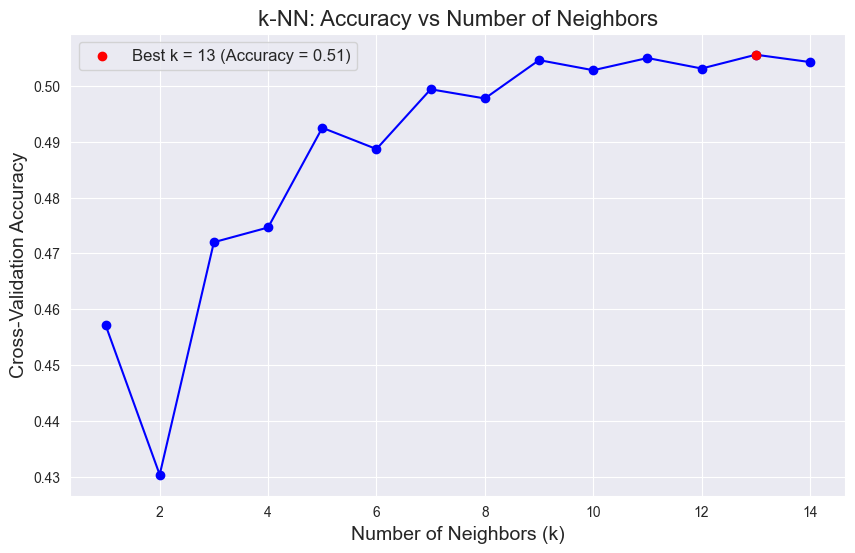

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(list(cross_val_scores.keys()), list(cross_val_scores.values()), marker='o', linestyle='-', color='blue')

# Add labels, title, and grid
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Cross-Validation Accuracy', fontsize=14)
plt.title('k-NN: Accuracy vs Number of Neighbors', fontsize=16)
plt.grid(True)

# Highlight the maximum accuracy point
best_accuracy = cross_val_scores[best_k]
plt.scatter(best_k, best_accuracy, color='red', label=f'Best k = {best_k} (Accuracy = {best_accuracy:.2f})', zorder=5)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [60]:
kNN_model = KNeighborsClassifier(n_neighbors=best_k)
kNN_model.fit(train_set_x, train_set_y)
predictions = kNN_model.predict(test_set_x)

# Visualization of Prediction Results

### The visualization displays **40 randomly selected data points** from the test set, showcasing the prediction results of the **KNN**, **Logistic Regression**, and **Random Forest** classifiers.

- <font color='red'>**Green dots** indicate correct predictions.</font>  
- <font color='red'>**Red dots** represent incorrect predictions.</font>  

By <font color='red'>**hovering over any point**</font>, detailed information about the corresponding prediction is displayed, including:  
- <font color='red'>Date</font>  
- <font color='red'>Location</font>  
- <font color='red'>Original Value</font>  
- <font color='red'>Predicted Value</font>  


In [61]:
visualize_errors(model_name = "kNN Classifier", random_state=212)

LOCATION                DATE          VALUE  \
0                       Albania/Tirana 2024-12-22 13:15:00  partly cloudy   
1     Antigua and Barbuda/Saint John's 2024-12-22 13:00:00           rain   
2                      Armenia/Yerevan 2024-12-22 13:15:00  partly cloudy   
3                   Australia/Canberra 2024-12-22 13:15:00  partly cloudy   
4                       Austria/Vienna 2024-12-22 13:15:00           rain   
...                                ...                 ...            ...   
1416                 Vanuatu/Port Vila 2025-01-03 13:45:00           rain   
1417                 Venezuela/Caracas 2025-01-03 13:00:00          foggy   
1418                     Vietnam/Hanoi 2025-01-03 13:45:00          clear   
1419                     Zambia/Lusaka 2025-01-03 13:45:00           rain   
1420                   Zimbabwe/Harare 2025-01-03 13:45:00           rain   

         PREDICTION  
0             sunny  
1     partly cloudy  
2             sunny  
3             sunny  
4          overcast  
...             ...  
1416  partly cloudy  
1417          clear  
1418          sunny  
1419  partly cloudy  
1420  partly cloudy  

[1421 rows x 4 columns]

### Explanation of Parameters in Logistic Regression

### penalty="l2":
The L2 regularization is applied to prevent overfitting by penalizing large coefficients.
This ensures the model generalizes better to unseen data.

### solver="liblinear":
Specifies the optimization algorithm. "liblinear" is efficient for smaller datasets and binary classification tasks.
It is also compatible with L2 regularization.

In [62]:
logistic_model = LogisticRegression(penalty="l2",max_iter = 400,solver='liblinear', random_state=17)
logistic_model.fit(train_set_x, train_set_y)
predictions = logistic_model.predict(test_set_x)

In [63]:
visualize_errors(model_name = "Logistic Classifier", random_state= 17)

LOCATION                DATE  \
0                      Andorra/Andorra La Vella 2024-12-22 13:45:00   
1              Antigua and Barbuda/Saint John's 2024-12-22 13:00:00   
2                                Bahamas/Nassau 2024-12-22 13:15:00   
3                           Barbados/Bridgetown 2024-12-22 13:15:00   
4                                 Belarus/Minsk 2024-12-22 13:15:00   
..                                          ...                 ...   
722                              Uganda/Kampala 2025-01-03 13:00:00   
723                                Ukraine/Kyiv 2025-01-03 13:00:00   
724  United States of America/Washington Harbor 2025-01-03 13:45:00   
725                          Uruguay/Montevideo 2025-01-03 13:30:00   
726                           Vanuatu/Port Vila 2025-01-03 13:45:00   

             VALUE     PREDICTION  
0            sunny  partly cloudy  
1             rain  partly cloudy  
2           cloudy  partly cloudy  
3             rain  partly cloudy  
4           cloudy  partly cloudy  
..             ...            ...  
722  partly cloudy          sunny  
723           rain  partly cloudy  
724       overcast  partly cloudy  
725  partly cloudy           rain  
726           rain  partly cloudy  

[727 rows x 4 columns]

In [64]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(train_set_x, train_set_y)
predictions = rf_model.predict(test_set_x)

In [65]:
visualize_errors(model_name = "RandomForest Classifier", random_state= 17)

LOCATION                DATE     VALUE  \
0                        Belarus/Minsk 2024-12-22 13:15:00    cloudy   
1                     Belgium/Brussels 2024-12-22 13:00:00      snow   
2                      Estonia/Tallinn 2024-12-22 13:15:00      snow   
3                         France/Paris 2024-12-22 12:45:00      rain   
4                       Germany/Berlin 2024-12-22 13:45:00      rain   
..                                 ...                 ...       ...   
207                    Serbia/Belgrade 2025-01-03 13:45:00      rain   
208                Singapore/Singapore 2025-01-03 13:45:00  overcast   
209                Suriname/Paramaribo 2025-01-03 13:30:00     foggy   
210  Trinidad and Tobago/Port Of Spain 2025-01-03 13:45:00  overcast   
211                    Tuvalu/Funafuti 2025-01-03 13:45:00  overcast   

        PREDICTION  
0    partly cloudy  
1             rain  
2             rain  
3    partly cloudy  
4    partly cloudy  
..             ...  
207  partly cloudy  
208  partly cloudy  
209           rain  
210           rain  
211           rain  

[212 rows x 4 columns]

Graph Analysis and Insights

KNN Classifier:
- The KNN classifier shows a mix of correct (green) and incorrect (red) predictions.
- There are notable instances of incorrect predictions spread across various locations, which may suggest sensitivity to overlapping features or class imbalances.
- The model struggles more than Logistic Regression and Random Forest, as evidenced by a higher number of red dots, indicating room for improvement in feature scaling or parameter tuning.

Logistic Regression:
- The Logistic Regression classifier exhibits fewer incorrect predictions compared to KNN, as indicated by a higher proportion of green dots.
- Incorrect predictions are still noticeable in some locations, likely due to the model's linear nature, which may struggle with capturing non-linear relationships in the data.
- Overall, the Logistic Regression model performs reasonably well, balancing simplicity and accuracy.

Random Forest Classifier:
- The Random Forest classifier demonstrates the highest accuracy among the three models, with very few incorrect predictions (red dots).
- Most predictions are correct, highlighting the robustness of the Random Forest model in handling diverse features and reducing misclassifications.
- The model's ability to correctly classify nearly all data points suggests it is highly effective for this dataset.

Additional Notes:
- The use of hover functionality is highly informative, providing key details about each prediction directly within the graph.
- The inclusion of a DataFrame listing all misclassified points is a valuable addition, allowing for further analysis of patterns and possible causes of errors.

Recommendations:
- Random Forest is the preferred model for this dataset due to its superior accuracy and robustness.
- Logistic Regression can be a good alternative if interpretability and computational efficiency are prioritized over accuracy.
- Further optimization of the KNN model, such as tuning the number of neighbors (k) or applying feature scaling, may improve its performance.
- Analyzing the locations and features of misclassified points can help identify specific weaknesses in each model and guide feature engineering efforts.

In [66]:
def evaluate_multiclass_model(models, X_test, y_test):
    """
    Plots aggregated ROC Curves, Confusion Matrices, and PR Curves for multiclass models.

    Parameters:
    - models: dict
        A dictionary where keys are model names and values are trained model instances.
    - X_test: array-like
        Test features.
    - y_test: array-like
        Ground truth labels.
    """
    # Binarize labels for multiclass evaluation
    classes = np.unique(y_test)
    y_test_binarized = label_binarize(y_test, classes=classes)
    n_classes = len(classes)

    plt.figure(figsize=(20, 15))
    
    for idx, (name, model) in enumerate(models.items()):
        y_pred_proba = model.predict_proba(X_test)
        y_pred = model.predict(X_test)
        
        # ROC Curve: Micro-average
        fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
        roc_auc = auc(fpr, tpr)
        
        plt.subplot(len(models), 3, idx * 3 + 1)
        plt.plot(fpr, tpr, label=f'Micro-Averaged ROC (AUC = {roc_auc:.2f})', color='blue')
        plt.plot([0, 1], [0, 1], 'k--', lw=2) 
        plt.title(f'ROC Curve: {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        
        plt.subplot(len(models), 3, idx * 3 + 2)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
        plt.title(f'Confusion Matrix: {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        
        # Precision-Recall Curve: Micro-average
        precision, recall, _ = precision_recall_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
        pr_auc = auc(recall, precision)
        
        plt.subplot(len(models), 3, idx * 3 + 3)
        plt.plot(recall, precision, label=f'Micro-Averaged PR (AUC = {pr_auc:.2f})', color='green')
        plt.title(f'Precision-Recall Curve: {name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='lower left')
    
    # Show all plots
    plt.tight_layout()
    plt.show()

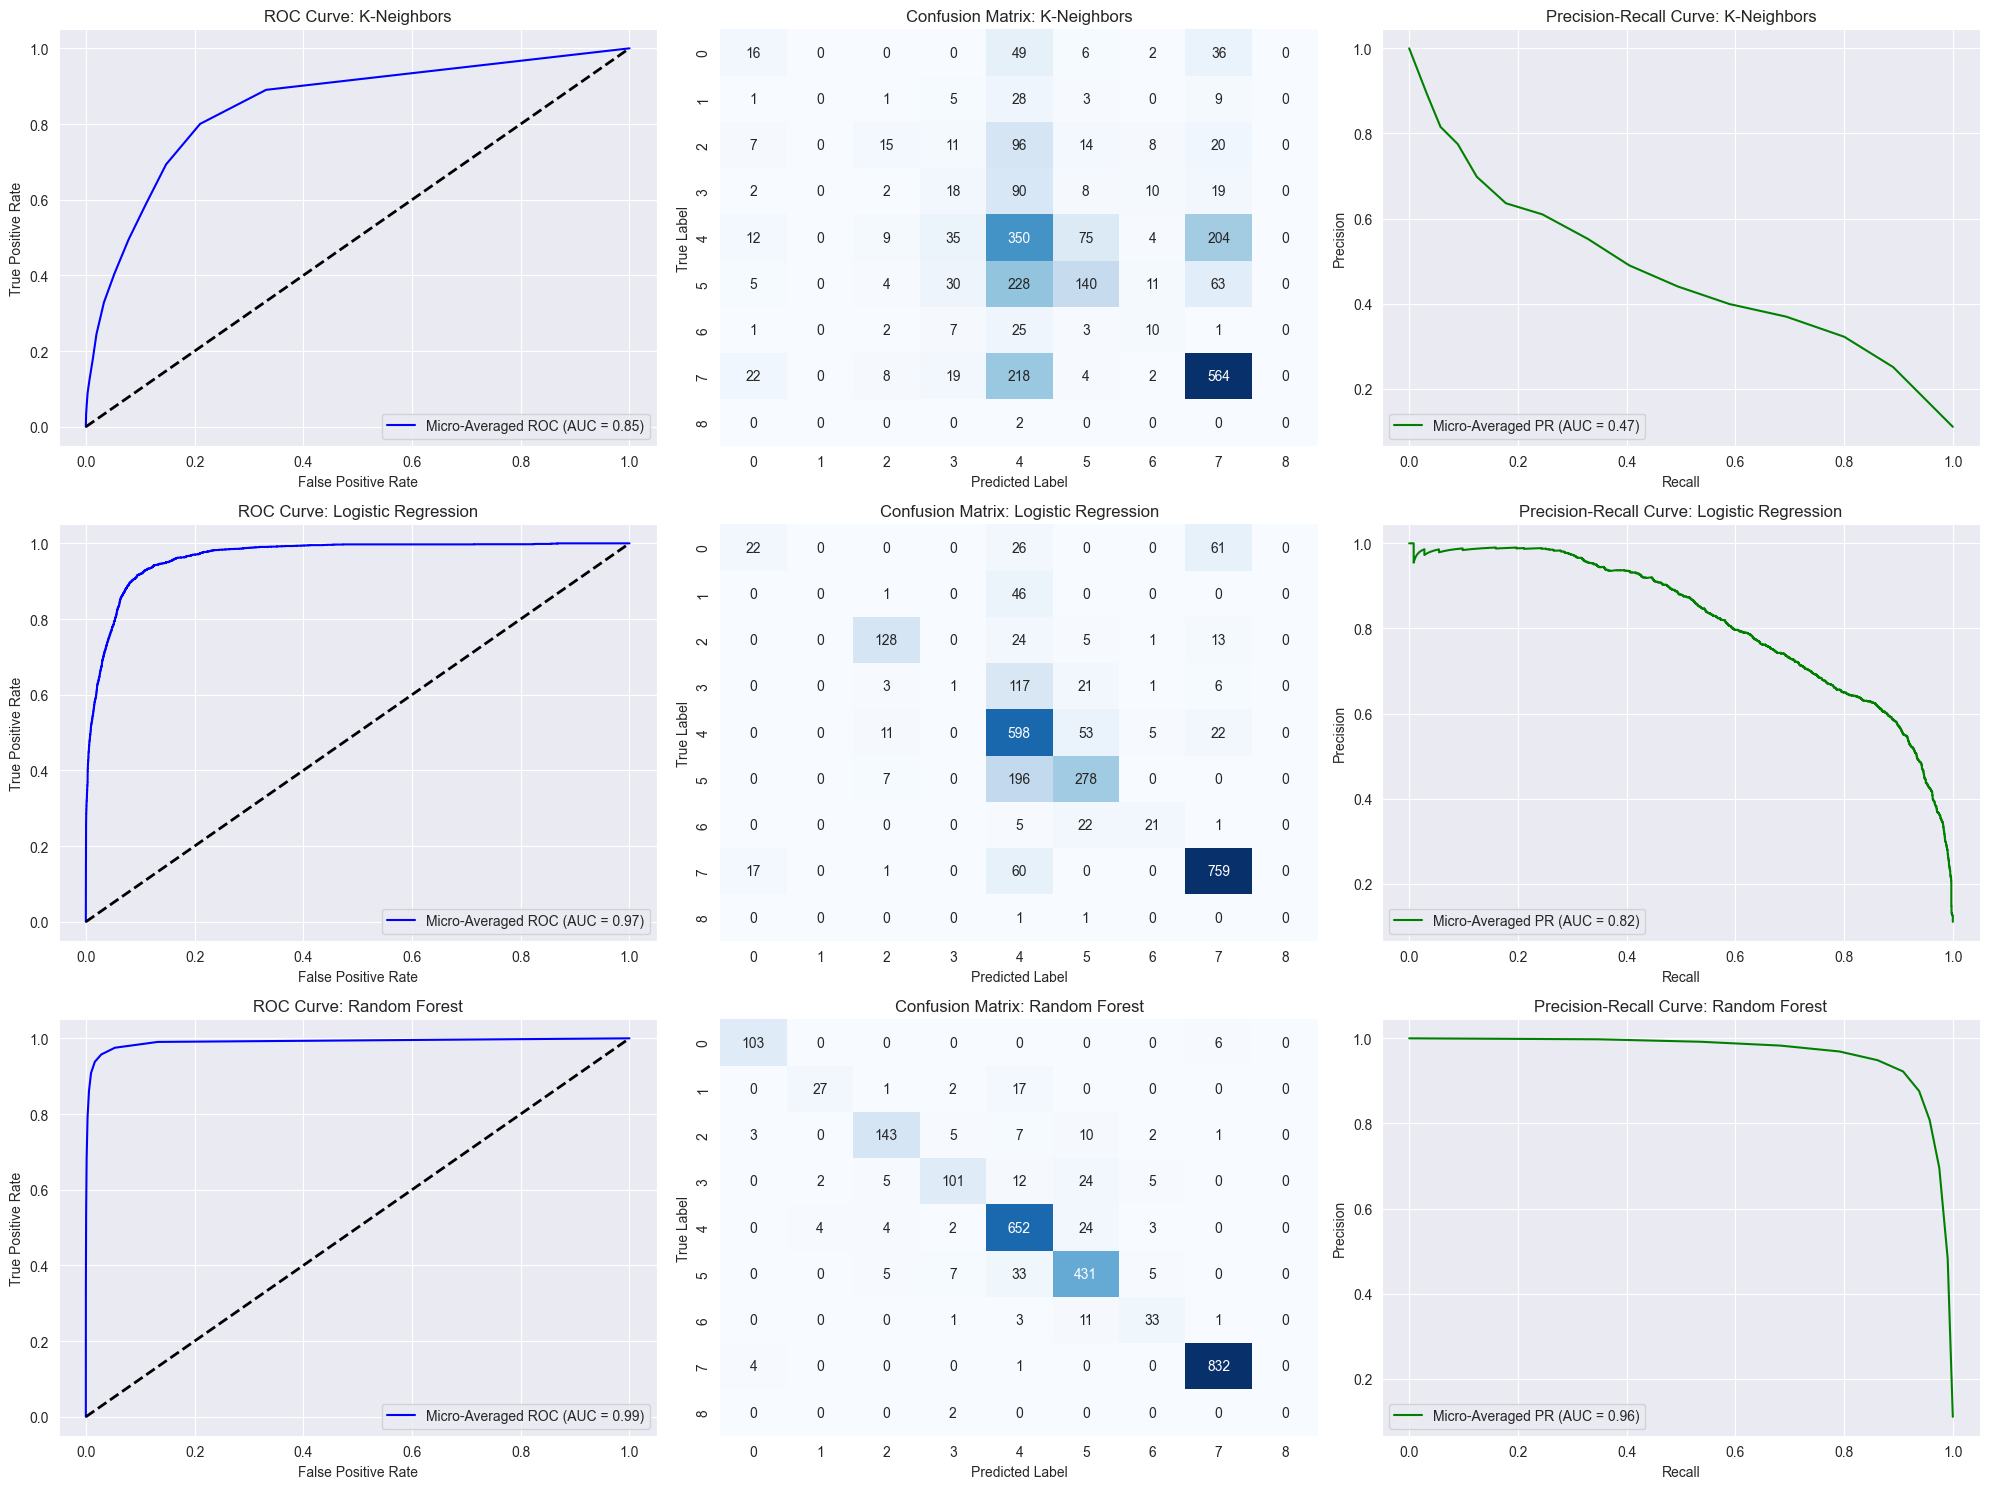

In [67]:
models = {
    "K-Neighbors": kNN_model,
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
}
evaluate_multiclass_model(models, test_set_x, test_set_y)

Model Performance Analysis

K-Neighbors Classifier:
The ROC Curve for K-Neighbors Classifier shows a good micro-averaged AUC of 0.85, though it's less effective compared to Logistic Regression and Random Forest.
The Confusion Matrix indicates moderate performance, with more frequent misclassifications, especially for classes with overlapping features.
The PR Curve has a micro-averaged AUC of 0.47, reflecting weaker precision-recall trade-offs, particularly in imbalanced or noisy classes.

Logistic Regression:
The ROC Curve for Logistic Regression shows an excellent micro-averaged AUC of 0.97, indicating strong discriminative power between classes.
The Confusion Matrix reveals good overall performance, though some misclassifications occur, particularly in smaller classes.
The Precision-Recall (PR) Curve displays a micro-averaged AUC of 0.82, suggesting that precision drops slightly as recall increases, especially for certain less frequent classes.

Random Forest:
The ROC Curve for Random Forest demonstrates a perfect micro-averaged AUC of 0.99, which highlights its outstanding ability to distinguish between all classes.
The Confusion Matrix confirms exceptional performance, with very few misclassifications. Most true labels align with their predicted labels.
The PR Curve with a micro-averaged AUC of 0.96 further supports Random Forest's robustness, maintaining high precision and recall across all classes.

General Observations:
1. Random Forest outperforms both Logistic Regression and K-Neighbors Classifier, achieving near-perfect scores in all metrics.
2. Logistic Regression also performs strongly, especially in terms of its ROC AUC and overall classification accuracy.
3. K-Neighbors Classifier struggles with precision and recall, likely due to its sensitivity to feature scaling and overlapping class distributions.
4. The Confusion Matrices emphasize that Random Forest handles imbalanced classes better than the other models.

Recommendations:
- Random Forest is the preferred model due to its consistent and superior performance.
- Logistic Regression is a viable alternative for simpler models with fewer computational requirements.
- K-Neighbors Classifier requires additional tuning (e.g., feature scaling, optimal K) to improve its performance.